In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import scipy
from scipy import stats

In [2]:
Transaction = pd.read_csv('C:/Users/ashle/Desktop/CreditCard/train_transaction.csv', index_col='TransactionID')
Identity= pd.read_csv('C:/Users/ashle/Desktop/CreditCard/train_identity.csv',index_col='TransactionID')

In [3]:
Transaction.head(10)

isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400            68.5         W  13926    NaN   
2987001              0          86401            29.0         W   2755  404.0   
2987002              0          86469            59.0         W   4663  490.0   
2987003              0          86499            50.0         W  18132  567.0   
2987004              0          86506            50.0         H   4497  514.0   
2987005              0          86510            49.0         W   5937  555.0   
2987006              0          86522           159.0         W  12308  360.0   
2987007              0          86529           422.5         W  12695  490.0   
2987008              0          86535            15.0         H   2803  100.0   
2987009              0          86536           117.0         W  17399  111.0   

               card3       card4  card5   card6  ...  V330  V331  V332  V333  \
TransactionID                                    ...                           
2987000        150.0    discover  142.0  credit  ...   NaN   NaN   NaN   NaN   
2987001        150.0  mastercard  102.0  credit  ...   NaN   NaN   NaN   NaN   
2987002        150.0        visa  166.0   debit  ...   NaN   NaN   NaN   NaN   
2987003        150.0  mastercard  117.0   debit  ...   NaN   NaN   NaN   NaN   
2987004        150.0  mastercard  102.0  credit  ...   0.0   0.0   0.0   0.0   
2987005        150.0        visa  226.0   debit  ...   NaN   NaN   NaN   NaN   
2987006        150.0        visa  166.0   debit  ...   NaN   NaN   NaN   NaN   
2987007        150.0        visa  226.0   debit  ...   NaN   NaN   NaN   NaN   
2987008        150.0        visa  226.0   debit  ...   0.0   0.0   0.0   0.0   
2987009        150.0  mastercard  224.0   debit  ...   NaN   NaN   NaN   NaN   

              V334 V335  V336  V337  V338  V339  
TransactionID                                    
2987000        NaN  NaN   NaN   NaN   NaN   NaN  
2987001        NaN  NaN   NaN   NaN   NaN   NaN  
2987002        NaN  NaN   NaN   NaN   NaN   NaN  
2987003        NaN  NaN   NaN   NaN   NaN   NaN  
2987004        0.0  0.0   0.0   0.0   0.0   0.0  
2987005        NaN  NaN   NaN   NaN   NaN   NaN  
2987006        NaN  NaN   NaN   NaN   NaN   NaN  
2987007        NaN  NaN   NaN   NaN   NaN   NaN  
2987008        0.0  0.0   0.0   0.0   0.0   0.0  
2987009        NaN  NaN   NaN   NaN   NaN   NaN  

[10 rows x 393 columns]

In [4]:
Identity.head(10)

id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
TransactionID                                                              
2987004          0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
2987008         -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2987010         -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
2987011         -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
2987016          0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   
2987017         -5.0   61141.0    3.0    0.0    3.0    0.0    NaN    NaN   
2987022        -15.0       NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2987038          0.0   31964.0    0.0    0.0    0.0  -10.0    NaN    NaN   
2987040        -10.0  116098.0    0.0    0.0    0.0    0.0    NaN    NaN   
2987048         -5.0  257037.0    NaN    NaN    0.0    0.0    NaN    NaN   

               id_09  id_10  ...                id_31 id_32      id_33  \
TransactionID                ...                                         
2987004          NaN    NaN  ...  samsung browser 6.2  32.0  2220x1080   
2987008          NaN    NaN  ...   mobile safari 11.0  32.0   1334x750   
2987010          0.0    0.0  ...          chrome 62.0   NaN        NaN   
2987011          NaN    NaN  ...          chrome 62.0   NaN        NaN   
2987016          0.0    0.0  ...          chrome 62.0  24.0   1280x800   
2987017          3.0    0.0  ...          chrome 62.0  24.0   1366x768   
2987022          NaN    NaN  ...                  NaN   NaN        NaN   
2987038          0.0    0.0  ...          chrome 62.0  32.0  1920x1080   
2987040          0.0    0.0  ...          chrome 62.0   NaN        NaN   
2987048          NaN    NaN  ...          chrome 62.0   NaN        NaN   

                        id_34 id_35 id_36  id_37  id_38  DeviceType  \
TransactionID                                                         
2987004        match_status:2     T     F      T      T      mobile   
2987008        match_status:1     T     F      F      T      mobile   
2987010                   NaN     F     F      T      T     desktop   
2987011                   NaN     F     F      T      T     desktop   
2987016        match_status:2     T     F      T      T     desktop   
2987017        match_status:2     T     F      T      T     desktop   
2987022                   NaN   NaN   NaN    NaN    NaN         NaN   
2987038        match_status:2     T     F      T      T      mobile   
2987040                   NaN     F     F      T      T     desktop   
2987048                   NaN     F     F      T      T     desktop   

                                  DeviceInfo  
TransactionID                                 
2987004        SAMSUNG SM-G892A Build/NRD90M  
2987008                           iOS Device  
2987010                              Windows  
2987011                                  NaN  
2987016                                MacOS  
2987017                              Windows  
2987022                                  NaN  
2987038                                  NaN  
2987040                              Windows  
2987048                              Windows  

[10 rows x 40 columns]

In [5]:
Train_data=pd.merge(Transaction,Identity,on="TransactionID",how ='left')

In [6]:
Train_data

isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400           68.50         W  13926    NaN   
2987001              0          86401           29.00         W   2755  404.0   
2987002              0          86469           59.00         W   4663  490.0   
2987003              0          86499           50.00         W  18132  567.0   
2987004              0          86506           50.00         H   4497  514.0   
...                ...            ...             ...       ...    ...    ...   
3577535              0       15811047           49.00         W   6550    NaN   
3577536              0       15811049           39.50         W  10444  225.0   
3577537              0       15811079           30.95         W  12037  595.0   
3577538              0       15811088          117.00         W   7826  481.0   
3577539              0       15811131          279.95         W  15066  170.0   

               card3       card4  card5   card6  ...                id_31  \
TransactionID                                    ...                        
2987000        150.0    discover  142.0  credit  ...                  NaN   
2987001        150.0  mastercard  102.0  credit  ...                  NaN   
2987002        150.0        visa  166.0   debit  ...                  NaN   
2987003        150.0  mastercard  117.0   debit  ...                  NaN   
2987004        150.0  mastercard  102.0  credit  ...  samsung browser 6.2   
...              ...         ...    ...     ...  ...                  ...   
3577535        150.0        visa  226.0   debit  ...                  NaN   
3577536        150.0  mastercard  224.0   debit  ...                  NaN   
3577537        150.0  mastercard  224.0   debit  ...                  NaN   
3577538        150.0  mastercard  224.0   debit  ...                  NaN   
3577539        150.0  mastercard  102.0  credit  ...                  NaN   

               id_32      id_33           id_34 id_35 id_36  id_37  id_38  \
TransactionID                                                               
2987000          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987001          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987002          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987003          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987004         32.0  2220x1080  match_status:2     T     F      T      T   
...              ...        ...             ...   ...   ...    ...    ...   
3577535          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
3577536          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
3577537          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
3577538          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
3577539          NaN        NaN             NaN   NaN   NaN    NaN    NaN   

               DeviceType                     DeviceInfo  
TransactionID                                             
2987000               NaN                            NaN  
2987001               NaN                            NaN  
2987002               NaN                            NaN  
2987003               NaN                            NaN  
2987004            mobile  SAMSUNG SM-G892A Build/NRD90M  
...                   ...                            ...  
3577535               NaN                            NaN  
3577536               NaN                            NaN  
3577537               NaN                            NaN  
3577538               NaN                            NaN  
3577539               NaN                            NaN  

[590540 rows x 433 columns]

In [7]:
Transaction1 = pd.read_csv('C:/Users/ashle/Desktop/CreditCard/test_transaction.csv', index_col='TransactionID')
Identity2= pd.read_csv('C:/Users/ashle/Desktop/CreditCard/test_identity.csv',index_col='TransactionID')

In [8]:
Transaction1.head(10)

TransactionDT  TransactionAmt ProductCD  card1  card2  card3  \
TransactionID                                                                 
3663549             18403224           31.95         W  10409  111.0  150.0   
3663550             18403263           49.00         W   4272  111.0  150.0   
3663551             18403310          171.00         W   4476  574.0  150.0   
3663552             18403310          284.95         W  10989  360.0  150.0   
3663553             18403317           67.95         W  18018  452.0  150.0   
3663554             18403323           57.95         W  12839  321.0  150.0   
3663555             18403350           87.00         W  16560  476.0  150.0   
3663556             18403387          390.00         W  15066  170.0  150.0   
3663557             18403405          103.95         W   2803  100.0  150.0   
3663558             18403416          117.00         W  12544  321.0  150.0   

                    card4  card5   card6  addr1  ...  V330  V331  V332 V333  \
TransactionID                                    ...                          
3663549              visa  226.0   debit  170.0  ...   NaN   NaN   NaN  NaN   
3663550              visa  226.0   debit  299.0  ...   NaN   NaN   NaN  NaN   
3663551              visa  226.0   debit  472.0  ...   NaN   NaN   NaN  NaN   
3663552              visa  166.0   debit  205.0  ...   NaN   NaN   NaN  NaN   
3663553        mastercard  117.0   debit  264.0  ...   NaN   NaN   NaN  NaN   
3663554              visa  226.0   debit  512.0  ...   NaN   NaN   NaN  NaN   
3663555              visa  126.0   debit  110.0  ...   NaN   NaN   NaN  NaN   
3663556        mastercard  102.0  credit  194.0  ...   NaN   NaN   NaN  NaN   
3663557              visa  226.0   debit  494.0  ...   NaN   NaN   NaN  NaN   
3663558              visa  226.0   debit  476.0  ...   NaN   NaN   NaN  NaN   

              V334  V335  V336  V337  V338  V339  
TransactionID                                     
3663549        NaN   NaN   NaN   NaN   NaN   NaN  
3663550        NaN   NaN   NaN   NaN   NaN   NaN  
3663551        NaN   NaN   NaN   NaN   NaN   NaN  
3663552        NaN   NaN   NaN   NaN   NaN   NaN  
3663553        NaN   NaN   NaN   NaN   NaN   NaN  
3663554        NaN   NaN   NaN   NaN   NaN   NaN  
3663555        NaN   NaN   NaN   NaN   NaN   NaN  
3663556        NaN   NaN   NaN   NaN   NaN   NaN  
3663557        NaN   NaN   NaN   NaN   NaN   NaN  
3663558        NaN   NaN   NaN   NaN   NaN   NaN  

[10 rows x 392 columns]

In [9]:
Identity2.head(10)

id-01     id-02  id-03  id-04  id-05  id-06  id-07  id-08  \
TransactionID                                                              
3663586        -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
3663588          0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
3663597         -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3663601        -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
3663602        -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   
3663622         -5.0   36786.0    NaN    NaN    4.0   -2.0    NaN    NaN   
3663624         -5.0   12577.0    0.0    0.0    2.0   -2.0    NaN    NaN   
3663626         -5.0   44726.0    0.0    0.0    0.0   -2.0    NaN    NaN   
3663629         -5.0  125997.0    0.0    0.0    2.0   -2.0    NaN    NaN   
3663658         -5.0   98741.0    NaN    NaN    0.0    0.0    NaN    NaN   

               id-09  id-10  ...                    id-31 id-32      id-33  \
TransactionID                ...                                             
3663586          NaN    NaN  ...  chrome 67.0 for android   NaN        NaN   
3663588          0.0    0.0  ...  chrome 67.0 for android  24.0   1280x720   
3663597          NaN    NaN  ...       ie 11.0 for tablet   NaN        NaN   
3663601          0.0    0.0  ...  chrome 67.0 for android   NaN        NaN   
3663602          NaN    NaN  ...  chrome 67.0 for android   NaN        NaN   
3663622          NaN    NaN  ...       mobile safari 11.0  32.0  2208x1242   
3663624          0.0    0.0  ...       mobile safari 11.0  32.0  2208x1242   
3663626          0.0    0.0  ...       mobile safari 11.0  32.0  2208x1242   
3663629          0.0    0.0  ...       mobile safari 11.0  32.0  2208x1242   
3663658          NaN    NaN  ...       mobile safari 11.0  32.0  2048x1536   

                        id-34 id-35 id-36  id-37  id-38  DeviceType  \
TransactionID                                                         
3663586                   NaN     F     F      T      F      mobile   
3663588        match_status:2     T     F      T      T      mobile   
3663597                   NaN     F     T      T      F     desktop   
3663601                   NaN     F     F      T      F      mobile   
3663602                   NaN     F     F      T      F      mobile   
3663622        match_status:2     T     F      F      T      mobile   
3663624        match_status:2     T     F      F      T      mobile   
3663626        match_status:2     T     F      F      T      mobile   
3663629        match_status:2     T     F      F      T      mobile   
3663658        match_status:2     T     F      F      F      mobile   

                                DeviceInfo  
TransactionID                               
3663586        MYA-L13 Build/HUAWEIMYA-L13  
3663588               LGLS676 Build/MXB48T  
3663597                        Trident/7.0  
3663601        MYA-L13 Build/HUAWEIMYA-L13  
3663602               SM-G9650 Build/R16NW  
3663622                         iOS Device  
3663624                         iOS Device  
3663626                         iOS Device  
3663629                         iOS Device  
3663658                         iOS Device  

[10 rows x 40 columns]

In [10]:
Test_data=pd.merge(Transaction1,Identity2,on="TransactionID", how='left')

In [11]:
Test_data.head(10)

TransactionDT  TransactionAmt ProductCD  card1  card2  card3  \
TransactionID                                                                 
3663549             18403224           31.95         W  10409  111.0  150.0   
3663550             18403263           49.00         W   4272  111.0  150.0   
3663551             18403310          171.00         W   4476  574.0  150.0   
3663552             18403310          284.95         W  10989  360.0  150.0   
3663553             18403317           67.95         W  18018  452.0  150.0   
3663554             18403323           57.95         W  12839  321.0  150.0   
3663555             18403350           87.00         W  16560  476.0  150.0   
3663556             18403387          390.00         W  15066  170.0  150.0   
3663557             18403405          103.95         W   2803  100.0  150.0   
3663558             18403416          117.00         W  12544  321.0  150.0   

                    card4  card5   card6  addr1  ...  id-31  id-32  id-33  \
TransactionID                                    ...                        
3663549              visa  226.0   debit  170.0  ...    NaN    NaN    NaN   
3663550              visa  226.0   debit  299.0  ...    NaN    NaN    NaN   
3663551              visa  226.0   debit  472.0  ...    NaN    NaN    NaN   
3663552              visa  166.0   debit  205.0  ...    NaN    NaN    NaN   
3663553        mastercard  117.0   debit  264.0  ...    NaN    NaN    NaN   
3663554              visa  226.0   debit  512.0  ...    NaN    NaN    NaN   
3663555              visa  126.0   debit  110.0  ...    NaN    NaN    NaN   
3663556        mastercard  102.0  credit  194.0  ...    NaN    NaN    NaN   
3663557              visa  226.0   debit  494.0  ...    NaN    NaN    NaN   
3663558              visa  226.0   debit  476.0  ...    NaN    NaN    NaN   

              id-34 id-35  id-36  id-37  id-38  DeviceType  DeviceInfo  
TransactionID                                                           
3663549         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663550         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663551         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663552         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663553         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663554         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663555         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663556         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663557         NaN   NaN    NaN    NaN    NaN         NaN         NaN  
3663558         NaN   NaN    NaN    NaN    NaN         NaN         NaN  

[10 rows x 432 columns]

In [12]:
Train_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 433 entries, isFraud to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 2.5 GB


In [13]:
Test_data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506691 entries, 3663549 to 4170239
Columns: 432 entries, TransactionDT to DeviceInfo
dtypes: float64(399), int64(2), object(31)
memory usage: 2.2 GB


In [14]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = Train_data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b/1024**2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 4.51 MB
Average memory usage for int columns: 4.51 MB
Average memory usage for object columns: 24.04 MB


In [15]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = Test_data.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b/1024**2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 3.87 MB
Average memory usage for int columns: 3.87 MB
Average memory usage for object columns: 21.15 MB


In [16]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

Train_data_int =Train_data.select_dtypes(include=['int'])
converted_int = Train_data_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(Train_data_int))
print(mem_usage(converted_int))

4.51 MB
4.51 MB


In [17]:
Train_data_float =Train_data.select_dtypes(include=['float'])
converted_float = Train_data_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(Train_data_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([Train_data_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

1802.19 MB
903.35 MB


before  after
float32     NaN  399.0
float64   399.0    NaN

In [18]:
Train_data_object =Train_data.select_dtypes(include=['object'])
converted_obj = pd.DataFrame()
for col in Train_data_object.columns:
    num_unique_values = len(Train_data_object[col].unique())
    num_total_values = len(Train_data_object[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = Train_data_object[col].astype('category')
    else:
        converted_obj.loc[:,col] = Train_data_object[col]

In [19]:
print(mem_usage(Train_data_object))
print(mem_usage(converted_obj))
compare_obj = pd.concat([Train_data_object.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

769.28 MB
23.92 MB


before  after
object      31.0    NaN
category     NaN   12.0
category     NaN    4.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0
category     NaN    1.0

In [20]:
optimized_Train_data = Train_data.copy()
optimized_Train_data[converted_int.columns] = converted_int
optimized_Train_data[converted_float.columns] = converted_float
optimized_Train_data[converted_obj.columns] = converted_obj
print(mem_usage(Train_data))
mem_usage(optimized_Train_data)

2580.47 MB


'936.28 MB'

In [21]:
dtypes = optimized_Train_data.dtypes
dtypes_col = dtypes.index
dtypes_type = [i.name for i in dtypes.values]
column_types = dict(zip(dtypes_col, dtypes_type))
preview = first2pairs = {key:value for key,value in list(column_types.items())[:10]}
import pprint
pp = pp = pprint.PrettyPrinter(indent=4)
pp.pprint(preview)

{   'ProductCD': 'category',
    'TransactionAmt': 'float32',
    'TransactionDT': 'int64',
    'card1': 'int64',
    'card2': 'float32',
    'card3': 'float32',
    'card4': 'category',
    'card5': 'float32',
    'card6': 'category',
    'isFraud': 'int64'}


In [22]:
read_and_optimized = Train_data.astype(column_types)
print(mem_usage(read_and_optimized))
read_and_optimized.head(15)

936.28 MB


isFraud  TransactionDT  TransactionAmt ProductCD  card1  card2  \
TransactionID                                                                   
2987000              0          86400       68.500000         W  13926    NaN   
2987001              0          86401       29.000000         W   2755  404.0   
2987002              0          86469       59.000000         W   4663  490.0   
2987003              0          86499       50.000000         W  18132  567.0   
2987004              0          86506       50.000000         H   4497  514.0   
2987005              0          86510       49.000000         W   5937  555.0   
2987006              0          86522      159.000000         W  12308  360.0   
2987007              0          86529      422.500000         W  12695  490.0   
2987008              0          86535       15.000000         H   2803  100.0   
2987009              0          86536      117.000000         W  17399  111.0   
2987010              0          86549       75.887001         C  16496  352.0   
2987011              0          86555       16.495001         C   4461  375.0   
2987012              0          86564       50.000000         W   3786  418.0   
2987013              0          86585       40.000000         W  12866  303.0   
2987014              0          86596       10.500000         W  11839  490.0   

               card3       card4  card5   card6  ...                id_31  \
TransactionID                                    ...                        
2987000        150.0    discover  142.0  credit  ...                  NaN   
2987001        150.0  mastercard  102.0  credit  ...                  NaN   
2987002        150.0        visa  166.0   debit  ...                  NaN   
2987003        150.0  mastercard  117.0   debit  ...                  NaN   
2987004        150.0  mastercard  102.0  credit  ...  samsung browser 6.2   
2987005        150.0        visa  226.0   debit  ...                  NaN   
2987006        150.0        visa  166.0   debit  ...                  NaN   
2987007        150.0        visa  226.0   debit  ...                  NaN   
2987008        150.0        visa  226.0   debit  ...   mobile safari 11.0   
2987009        150.0  mastercard  224.0   debit  ...                  NaN   
2987010        117.0  mastercard  134.0  credit  ...          chrome 62.0   
2987011        185.0  mastercard  224.0   debit  ...          chrome 62.0   
2987012        150.0        visa  226.0   debit  ...                  NaN   
2987013        150.0        visa  226.0   debit  ...                  NaN   
2987014        150.0        visa  226.0   debit  ...                  NaN   

               id_32      id_33           id_34 id_35 id_36  id_37  id_38  \
TransactionID                                                               
2987000          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987001          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987002          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987003          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987004         32.0  2220x1080  match_status:2     T     F      T      T   
2987005          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987006          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987007          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987008         32.0   1334x750  match_status:1     T     F      F      T   
2987009          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987010          NaN        NaN             NaN     F     F      T      T   
2987011          NaN        NaN             NaN     F     F      T      T   
2987012          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987013          NaN        NaN             NaN   NaN   NaN    NaN    NaN   
2987014          NaN        NaN             NaN   NaN   NaN    NaN    NaN   

               De

In [23]:
#percentage of missing value
missvalue = Train_data.isnull().sum()
pmissval = 100*Train_data.isnull().sum()/len(Train_data)
missingvalues = pd.concat ([missvalue,pmissval], axis = 1)
missingvaluestab = missingvalues.rename(columns={0 : 'missingvalues', 1: '%missingvalues'})
missingvaluetabsort = missingvaluestab.sort_values(by=['missingvalues','%missingvalues'],ascending=False).round(1)
print (f'Dataframe has {Train_data.shape[1]} columns.')
print (f'There are {Train_data.isnull().any().sum()} columns that have missing values.')
missingvaluetabsort

Dataframe has 433 columns.
There are 414 columns that have missing values.


missingvalues  %missingvalues
id_24         585793            99.2
id_25         585408            99.1
id_07         585385            99.1
id_08         585385            99.1
id_21         585381            99.1
...              ...             ...
C10                0             0.0
C11                0             0.0
C12                0             0.0
C13                0             0.0
C14                0             0.0

[433 rows x 2 columns]

In [24]:
missvalue1 = Test_data.isnull().sum()
pmissval1 = 100*Test_data.isnull().sum()/len(Test_data)
missingvalues1 = pd.concat ([missvalue1,pmissval1], axis = 1)
missingvaluestab1 = missingvalues1.rename(columns={0 : 'missingvalues', 1: '%missingvalues'})
missingvaluetabsort1 = missingvaluestab1.sort_values(by=['missingvalues','%missingvalues'],ascending=False).round(1)
print (f'Dataframe has {Test_data.shape[1]} columns.')
print (f'There are {Test_data.isnull().any().sum()} columns that have missing values.')
missingvaluetabsort1

Dataframe has 432 columns.
There are 385 columns that have missing values.


missingvalues  %missingvalues
id-24         501951            99.1
id-25         501652            99.0
id-26         501644            99.0
id-07         501632            99.0
id-08         501632            99.0
...              ...             ...
V133               0             0.0
V134               0             0.0
V135               0             0.0
V136               0             0.0
V137               0             0.0

[432 rows x 2 columns]

In [25]:
Train_data.dtypes.value_counts()

float64    399
object      31
int64        3
dtype: int64

In [26]:
Train_data.describe()

isFraud  TransactionDT  TransactionAmt          card1  \
count  590540.000000   5.905400e+05   590540.000000  590540.000000   
mean        0.034990   7.372311e+06      135.027176    9898.734658   
std         0.183755   4.617224e+06      239.162522    4901.170153   
min         0.000000   8.640000e+04        0.251000    1000.000000   
25%         0.000000   3.027058e+06       43.321000    6019.000000   
50%         0.000000   7.306528e+06       68.769000    9678.000000   
75%         0.000000   1.124662e+07      125.000000   14184.000000   
max         1.000000   1.581113e+07    31937.391000   18396.000000   

               card2          card3          card5          addr1  \
count  581607.000000  588975.000000  586281.000000  524834.000000   
mean      362.555488     153.194925     199.278897     290.733794   
std       157.793246      11.336444      41.244453     101.741072   
min       100.000000     100.000000     100.000000     100.000000   
25%       214.000000     150.000000     166.000000     204.000000   
50%       361.000000     150.000000     226.000000     299.000000   
75%       512.000000     150.000000     226.000000     330.000000   
max       600.000000     231.000000     237.000000     540.000000   

               addr2          dist1  ...          id_17         id_18  \
count  524834.000000  238269.000000  ...  139369.000000  45113.000000   
mean       86.800630     118.502180  ...     189.451377     14.237337   
std         2.690623     371.872026  ...      30.375360      1.561302   
min        10.000000       0.000000  ...     100.000000     10.000000   
25%        87.000000       3.000000  ...     166.000000     13.000000   
50%        87.000000       8.000000  ...     166.000000     15.000000   
75%        87.000000      24.000000  ...     225.000000     15.000000   
max       102.000000   10286.000000  ...     229.000000     29.000000   

               id_19          id_20        id_21        id_22        id_24  \
count  139318.000000  139261.000000  5159.000000  5169.000000  4747.000000   
mean      353.128174     403.882666   368.269820    16.002708    12.800927   
std       141.095343     152.160327   198.847038     6.897665     2.372447   
min       100.000000     100.000000   100.000000    10.000000    11.000000   
25%       266.000000     256.000000   252.000000    14.000000    11.000000   
50%       341.000000     472.000000   252.000000    14.000000    11.000000   
75%       427.000000     533.000000   486.500000    14.000000    15.000000   
max       671.000000     661.000000   854.000000    44.000000    26.000000   

             id_25        id_26         id_32  
count  5132.000000  5163.000000  77586.000000  
mean    329.608924   149.070308     26.508597  
std      97.461089    32.101995      3.737502  
min     100.000000   100.000000      0.000000  
25%     321.000000   119.000000     24.000000  
50%     321.000000   149.000000     24.000000  
75%     371.000000   169.000000     32.000000  
max     548.000000   216.000000     32.000000  

[8 rows x 402 columns]

In [27]:
Train_data.describe(include=['object'])

ProductCD   card4   card6 P_emaildomain R_emaildomain      M1      M2  \
count     590540  588963  588969        496084        137291  319440  319440   
unique         5       4       4            59            60       2       2   
top            W    visa   debit     gmail.com     gmail.com       T       T   
freq      439670  384767  439938        228355         57147  319415  285468   

            M3      M4      M5  ...       id_30        id_31      id_33  \
count   319440  309096  240058  ...       77565       140282      73289   
unique       2       3       2  ...          75          130        260   
top          T      M0       F  ...  Windows 10  chrome 63.0  1920x1080   
freq    251731  196405  132491  ...       21155        22000      16874   

                 id_34   id_35   id_36   id_37   id_38 DeviceType DeviceInfo  
count            77805  140985  140985  140985  140985     140810     118666  
unique               4       2       2       2       2          2       1786  
top     match_status:2       T       F       T       F    desktop    Windows  
freq             60011   77814  134066  110452   73922      85165      47722  

[4 rows x 31 columns]

In [28]:
def Outliers(Train_data):
    data_mean,data_std = np.mean(Train_data), np.std(Train_data)
# identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    lower_outlier = [x for x in Train_data if x < lower]
    upper_outlier = [x for x in Train_data if x > lower]
    outliers = [x for x in Train_data if x < lower or x > upper]
    print('Identified lowest outlier: %d' % len(lower_outlier))
    print('Identified upper outlier: %d' % len(upper_outlier))
    print('Identified outliers: %d' % len(outliers))
# remove outliers
    outliers_removed = [x for x in Train_data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print("Total percentage of Outliers: ", round((len(outliers) / len(outliers_removed) )*100, 4))

    return

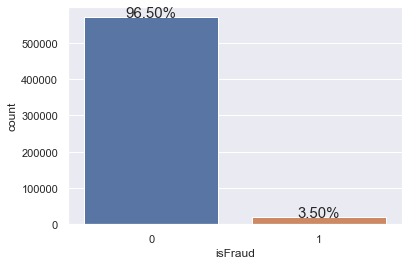

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x='isFraud',  data=Train_data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center", fontsize=15)
plt.show()

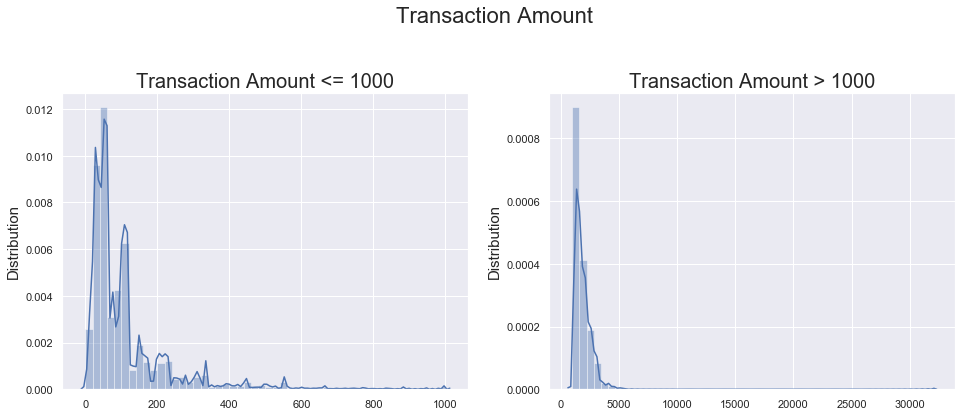

In [32]:
plt.figure(figsize=(16,12))
plt.suptitle('Transaction Amount', fontsize=22)
plt.subplot(221)
ax1 = sns.distplot(Train_data[Train_data['TransactionAmt'] <= 1000]['TransactionAmt'])
ax1.set_title("Transaction Amount <= 1000", fontsize=20)
ax1.set_xlabel("")
ax1.set_ylabel("Distribution", fontsize=15)
plt.subplot(222)
ax2 = sns.distplot(Train_data[Train_data['TransactionAmt'] > 1000]['TransactionAmt'])
ax2.set_title("Transaction Amount > 1000", fontsize=20)
ax2.set_xlabel("")
ax2.set_ylabel("Distribution", fontsize=15)
plt.show()

In [33]:
print(pd.concat([Train_data[Train_data['isFraud'] == 1]['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index(), 
                 Train_data[Train_data['isFraud'] == 0]['TransactionAmt'].quantile([.01, .1, .25, .5, .75, .9, .99]).reset_index()],
                axis=1, keys=['Fraud', "No Fraud"]))

  Fraud                No Fraud               
  index TransactionAmt    index TransactionAmt
0  0.01        6.74096     0.01        9.51288
1  0.10       18.93600     0.10       26.31000
2  0.25       35.04400     0.25       43.97000
3  0.50       75.00000     0.50       68.50000
4  0.75      161.00000     0.75      120.00000
5  0.90      335.00000     0.90      267.11200
6  0.99      994.00000     0.99     1104.00000


In [34]:
Outliers(Train_data['TransactionAmt'])

Identified lowest outlier: 0
Identified upper outlier: 590540
Identified outliers: 10093
Non-outlier observations: 580447
Total percentage of Outliers:  1.7388


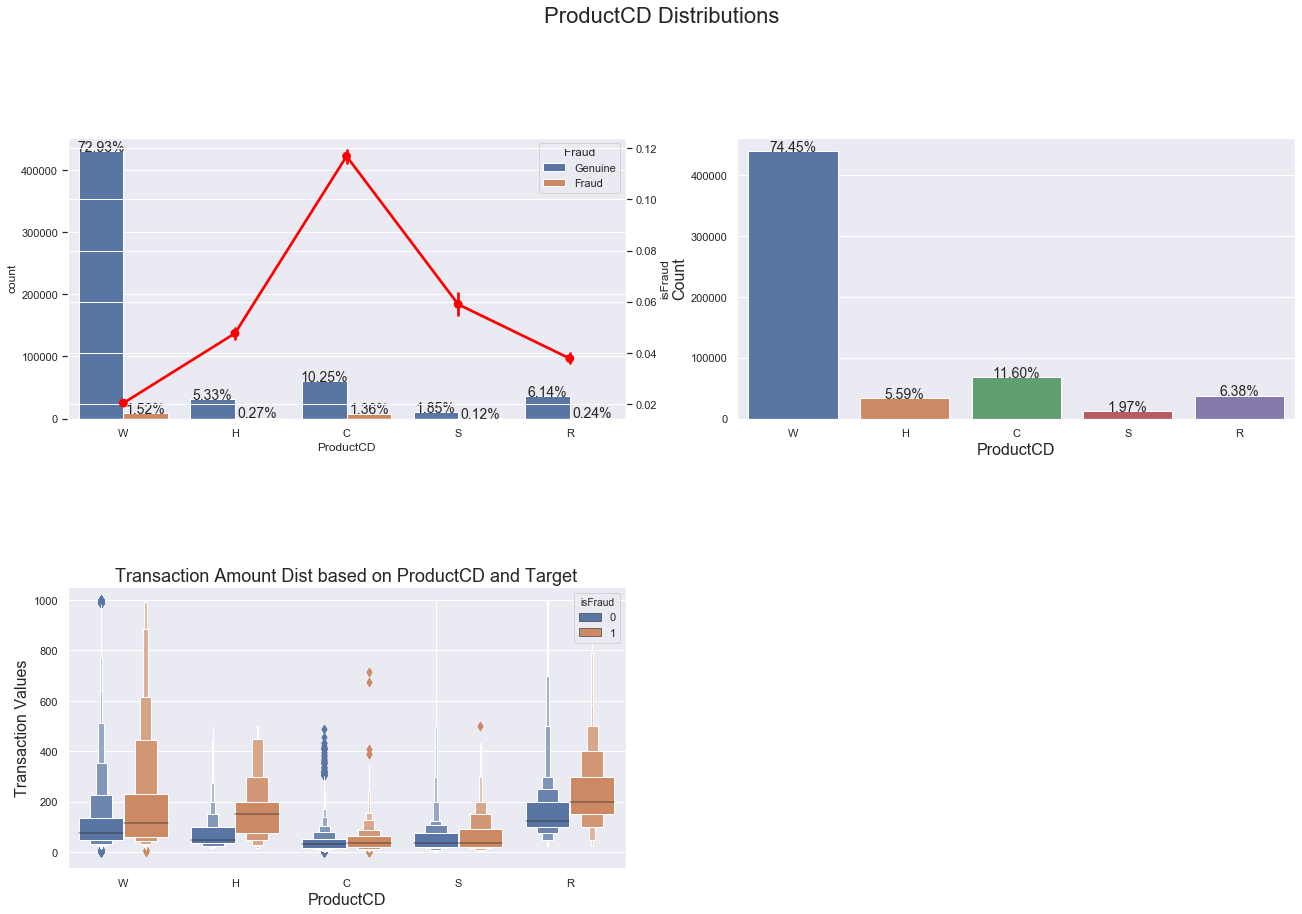

In [35]:
plt.figure(figsize=(22,14))
plt.suptitle('ProductCD Distributions', fontsize=22)

plt.subplot(221)
sns.set(style="darkgrid")
ax = sns.countplot(x='ProductCD', hue='isFraud', data=Train_data)
plt.legend(title='Fraud', loc='best', labels=['Genuine', 'Fraud'])
am = ax.twinx()
am= sns.pointplot(x='ProductCD', y='isFraud', data=Train_data, color='red')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center", fontsize=14)

plt.subplot(222)
sns.set(style="darkgrid")
a= sns.countplot(x='ProductCD', data=Train_data)
a.set_title(" ", fontsize=19)
a.set_xlabel("ProductCD", fontsize=16)
a.set_ylabel("Count", fontsize=16)

for p in a.patches:
    height = p.get_height()
    a.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center", fontsize=14)

plt.subplot(223)
b = sns.boxenplot(x='ProductCD', y='TransactionAmt', hue='isFraud', 
              data=Train_data[Train_data['TransactionAmt'] <= 1000] )
b.set_title("Transaction Amount Dist based on ProductCD and Target", fontsize=18)
b.set_xlabel("ProductCD", fontsize=16)
b.set_ylabel("Transaction Values", fontsize=16)

plt.subplots_adjust(hspace = 0.6, top = 0.85)
plt.show()

In [36]:
import datetime

START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, "%Y-%m-%d")
Train_data["Date"] = Train_data['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds=x)))

Train_data['_Weekdays'] = Train_data['Date'].dt.dayofweek
Train_data['_Hours'] = Train_data['Date'].dt.hour
Train_data['_Days'] = Train_data['Date'].dt.day

In [37]:
Train_data['TransactionDT'].head(12)

TransactionID
2987000    86400
2987001    86401
2987002    86469
2987003    86499
2987004    86506
2987005    86510
2987006    86522
2987007    86529
2987008    86535
2987009    86536
2987010    86549
2987011    86555
Name: TransactionDT, dtype: int64

In [38]:
def ploting(df, col, lim=2000):
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'Genuine', 1:'Fraud'}, inplace=True)

    plt.figure(figsize=(14,10))
    plt.suptitle(f'{col} Distributions', fontsize=22)

    plt.subplot(221)
    a = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    a.set_title(f'{col} Distributions', fontsize=19)
    a.set_ylim(0,500000)
    a.set_xlabel(f'{col} Names', fontsize=17)
    a.set_ylabel("Count", fontsize=17)
    for p in a.patches:
        height = p.get_height()
        a.text(p.get_x()+p.get_width()/2.,
              height + 3,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center",fontsize=14) 


    plt.subplot(222)
    a1 = sns.countplot(x=col, hue='isFraud', data=Train_data, order=list(tmp[col].values))
    plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
    am = a1.twinx()
    am = sns.pointplot(x=col, y='Fraud', data=tmp, 
                   color='black', legend=False,
                   order=list(tmp[col].values))
    am.set_ylabel("% of Fraud Transactions", fontsize=16)
    a1.set_title(f'{col} by Target(isFraud)', fontsize=19)
    a1.set_xlabel(f'{col} Names', fontsize=17)
    a1.set_ylabel("Count", fontsize=17)

    plt.subplot(212)
    a2 = sns.boxenplot(x=col, y='TransactionAmt', hue='isFraud', 
              data=Train_data[Train_data['TransactionAmt'] <= 2000] )
    a2.set_title(f'{col} Distributions by ProductCD and Target', fontsize=20)
    a2.set_xlabel(f'{col} Names', fontsize=17)
    a2.set_ylabel("Transaction Values", fontsize=17)

    plt.subplots_adjust(hspace = 0.6, top = 0.85)

    plt.show()


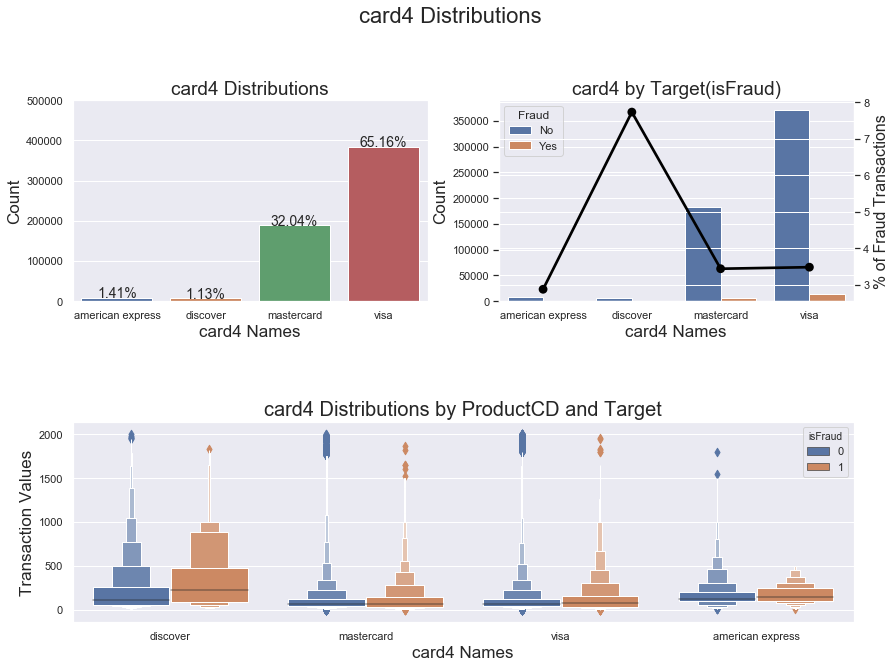

In [39]:
ploting(Train_data, 'card4')

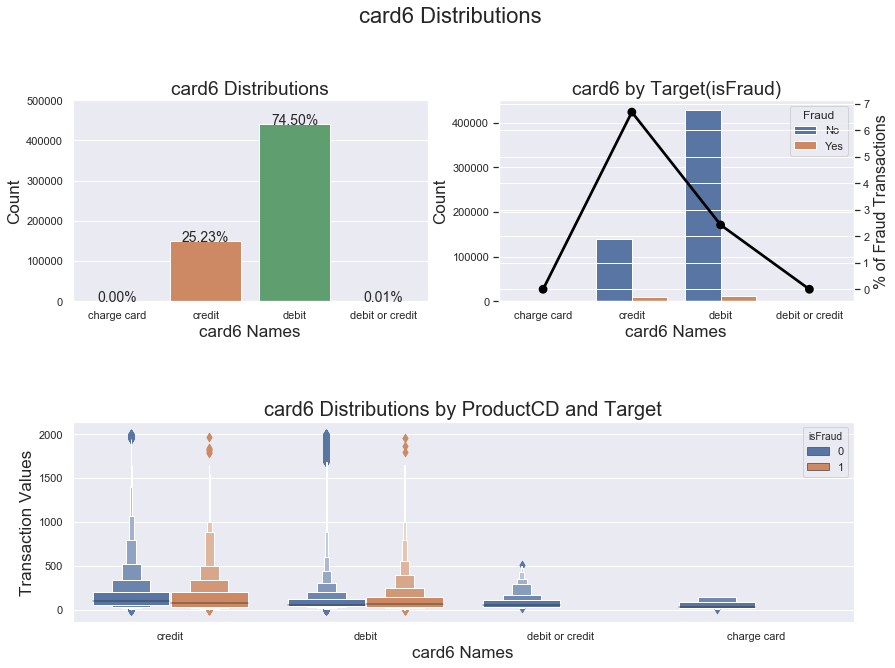

In [40]:
ploting(Train_data, 'card6')

In [41]:
def ploting_num(df, col, lim=2000):
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'Genuine', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(14,10))
    plt.suptitle(f'{col} Distributions', fontsize=22)
    
    plt.subplot(411)
    a = sns.distplot(Train_data[Train_data['isFraud'] == 1][col].dropna(), label='Fraud')
    a = sns.distplot(Train_data[Train_data['isFraud'] == 0][col].dropna(), label='NoFraud')
    a.legend()
    a.set_title(f'{col} Values Distribution by Target', fontsize=20)
    a.set_xlabel(f'{col} Values', fontsize=18)
    a.set_ylabel("Probability", fontsize=18)


plt.show()

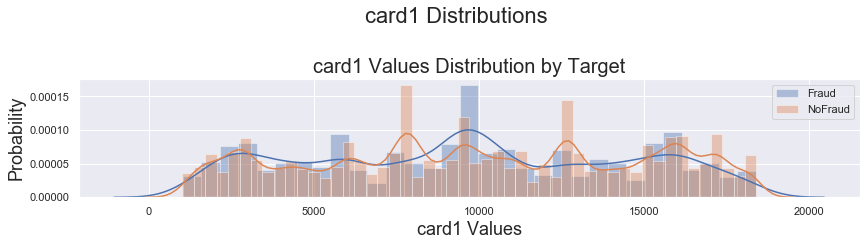

In [42]:
ploting_num(Train_data, 'card1')

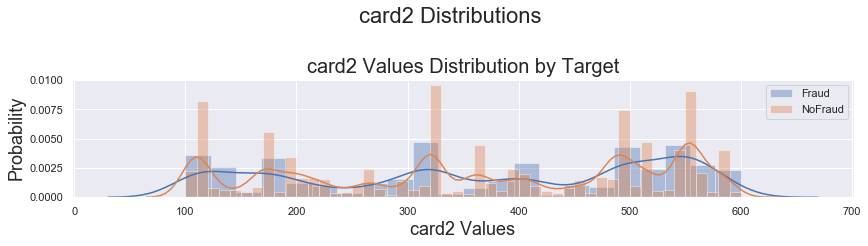

In [43]:
ploting_num(Train_data, 'card2')

In [44]:
Train_data.loc[Train_data.card3.isin(Train_data.card3.value_counts()[Train_data.card3.value_counts() < 200].index), 'card3'] = "Others"
Train_data.loc[Train_data.card5.isin(Train_data.card5.value_counts()[Train_data.card5.value_counts() < 300].index), 'card5'] = "Others"

def ploting_card(df, col, lim=2000):
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'Genuine', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(14,14))
    plt.suptitle(f'{col} Distributions', fontsize=22)
    
    plt.subplot(411)
    a1 = sns.countplot(x=col, data=Train_data, order=list(tmp[col].values))
    am = a1.twinx()
    a2 = sns.pointplot(x=col, y='Fraud', data=tmp, 
                    color='black', order=list(tmp[col].values))
    a2.set_ylabel("% of Fraud Transactions", fontsize=16)
    a1.set_title(f'{col} Values Distribution and % of Transaction Frauds', fontsize=20)
    a1.set_xlabel(f'{col} Values', fontsize=18)
    a1.set_ylabel("Count", fontsize=18)
    for p in a1.patches:
        height = p.get_height()
        a1.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center") 

        
plt.show()

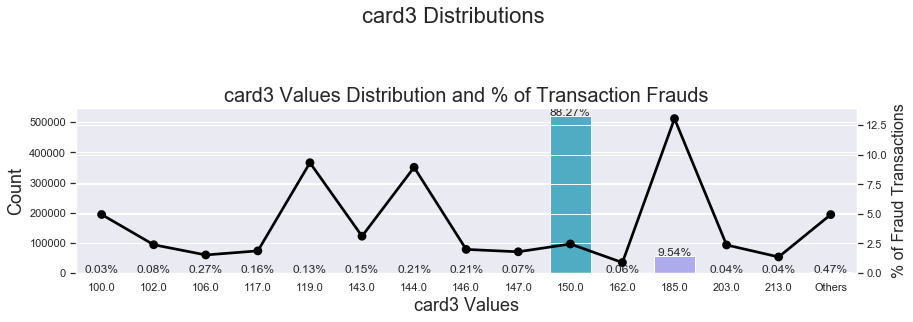

In [45]:
ploting_card(Train_data, 'card3')

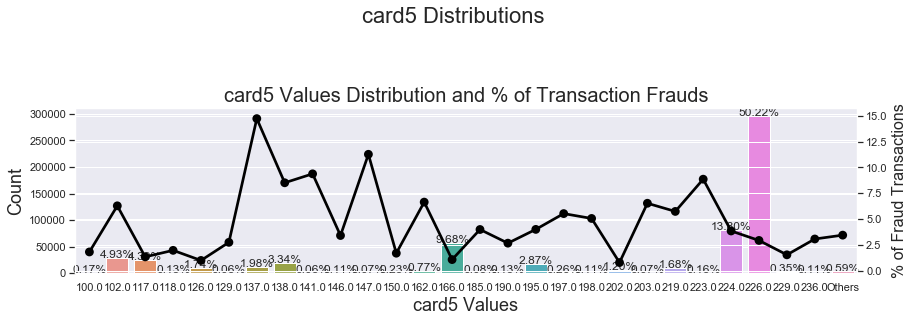

In [46]:
ploting_card(Train_data, 'card5')

In [47]:
total_amt = Train_data.groupby(['isFraud'])['TransactionAmt'].sum().sum()
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    Train_data[col] = Train_data[col].fillna("Miss")

def ploting_M(df, col, lim=2000):
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'Genuine', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(20,5))
    plt.suptitle(f'{col} Distributions', fontsize=22)
    
    plt.subplot(121)
    a1 = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    a1.set_title(f"{col} Distribution and  %Fraud by each category", fontsize=18)
    a1.set_ylim(0,400000)
    a2 = a1.twinx()
    a2 = sns.pointplot(x=col, y='Fraud', data=tmp, 
                    color='black', order=list(tmp[col].values))
    a2.set_ylim(0,20)
    a2.set_ylabel("% of Fraud Transactions", fontsize=16)
    a1.set_xlabel(f'{col} Values', fontsize=16)
    a1.set_ylabel("Count", fontsize=16)
    for p in a2.patches:
        height = p.get_height()
        a1.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center") 
        
    pamt = (Train_data.groupby(['isFraud',col])['TransactionAmt'].sum() / total_amt * 100).unstack('isFraud')
    pamt = pamt.reset_index()
    pamt.rename(columns={0:'NoFraud', 1:'Fraud'}, inplace=True)
    
    plt.subplot(122)
    a3 = sns.boxplot(x=col, y='TransactionAmt', hue='isFraud', 
                     data=df[df['TransactionAmt'] <= lim], order=list(tmp[col].values))
    a4 = a3.twinx()
    a4 = sns.pointplot(x=col, y='Fraud', data=pamt, order=list(tmp[col].values),
                       color='black', legend=False,)
    a4.set_ylim(0,5)
    a4.set_ylabel("% Fraud amt", fontsize=16)
    a3.set_title(f'{col} Trans Dist', fontsize=20)
    a3.set_xlabel(f'{col} Values', fontsize=18)
    a3.set_ylabel("Count", fontsize=18)
    
    plt.subplots_adjust(hspace=.4, wspace = 0.35, top = 0.80)
    
    plt.show()

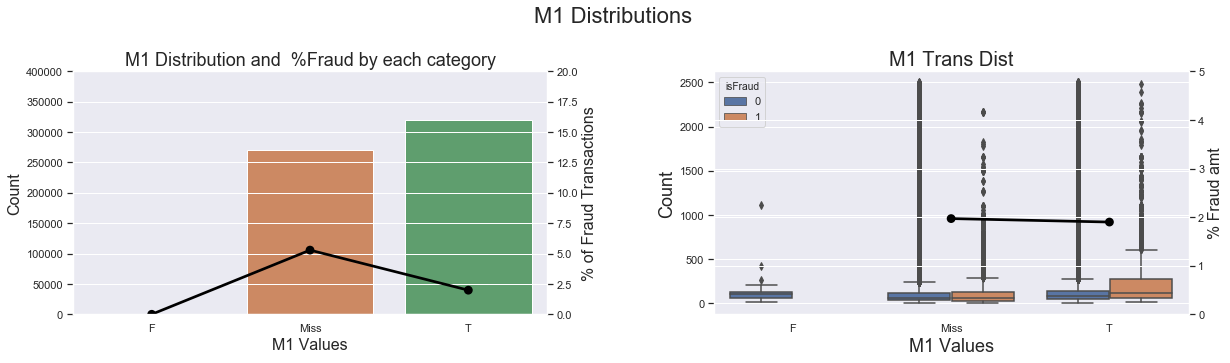

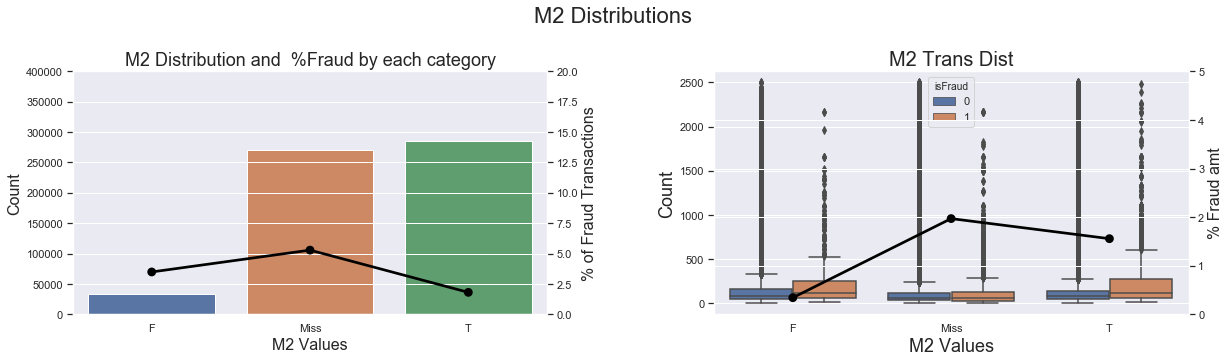

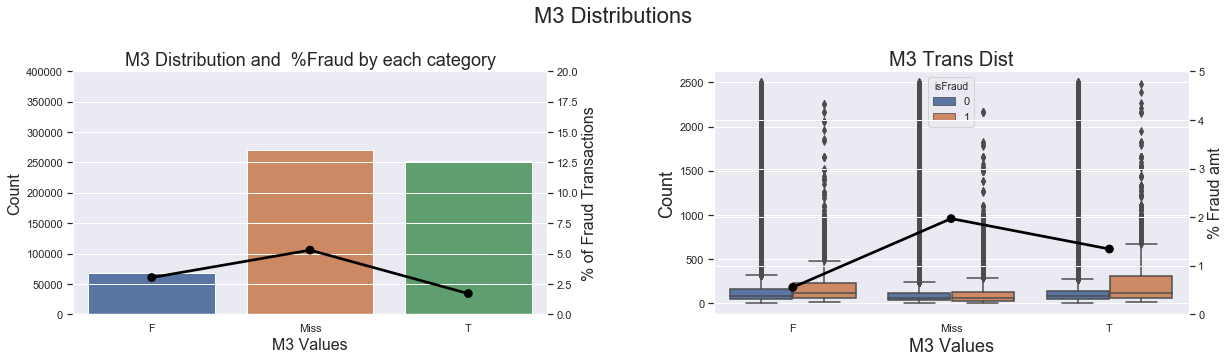

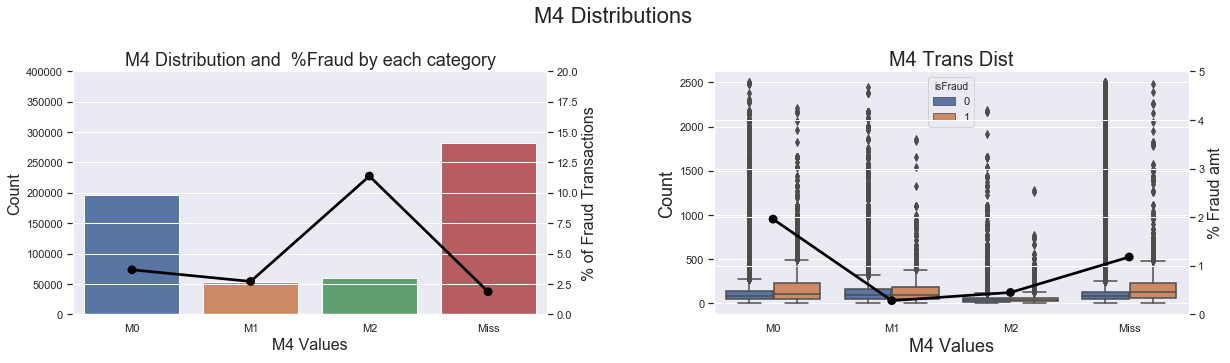

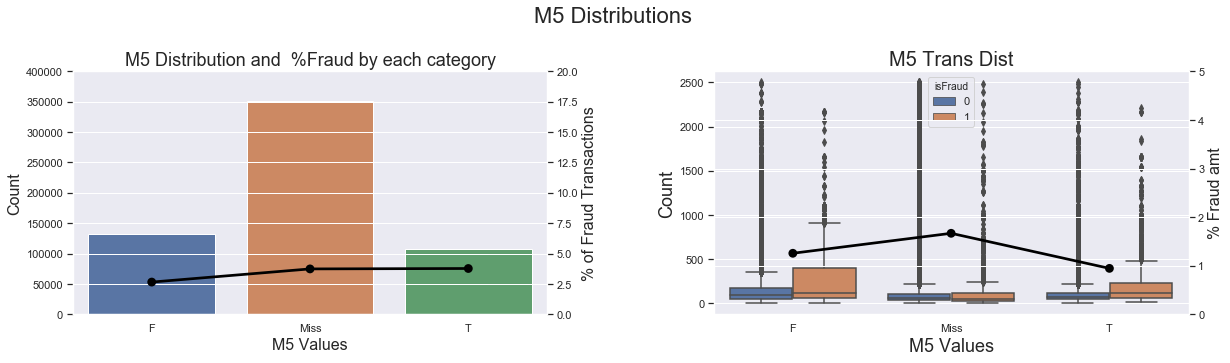

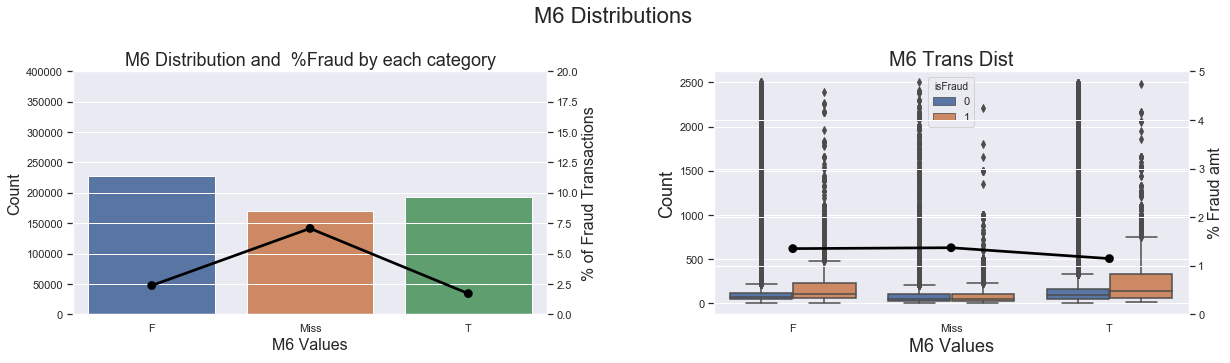

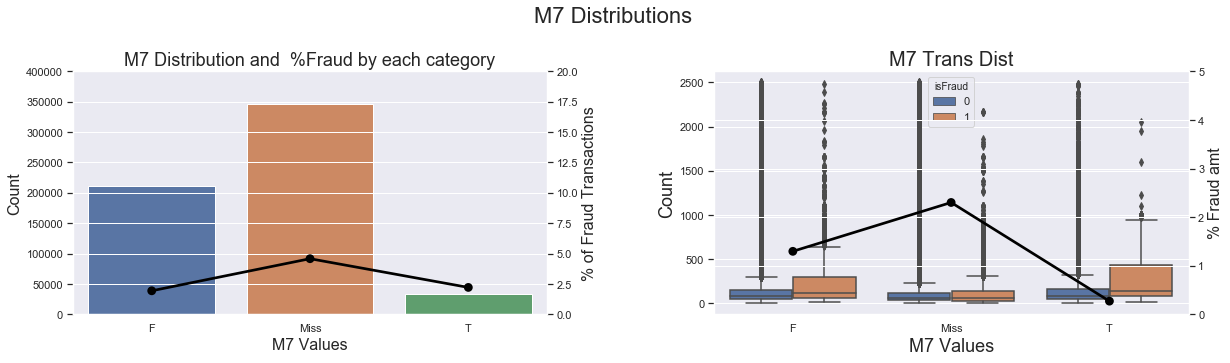

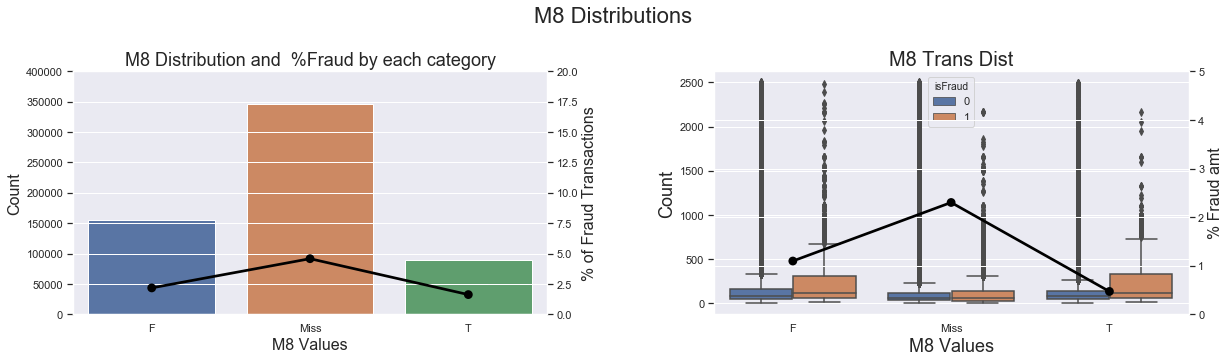

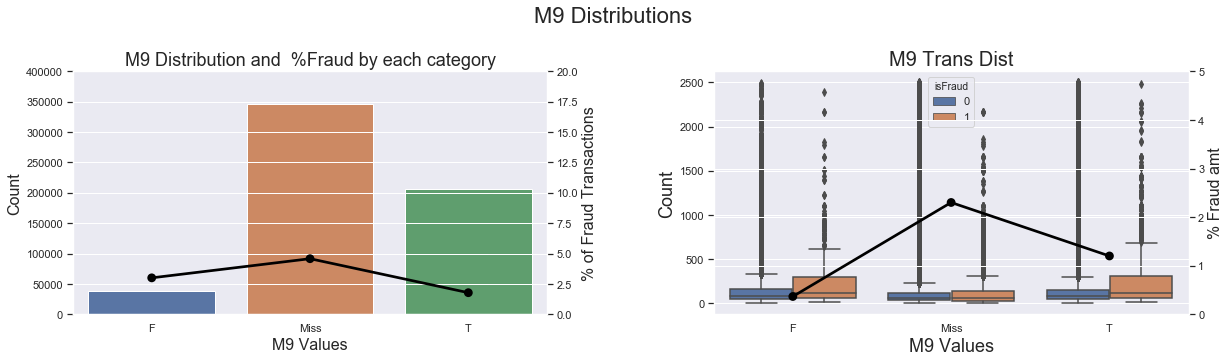

In [48]:
for col in ['M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']:
    ploting_M(Train_data, col, lim=2500)

In [49]:
Train_data.loc[Train_data.addr1.isin(Train_data.addr1.value_counts()[Train_data.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
Train_data.loc[Train_data.addr2.isin(Train_data.addr2.value_counts()[Train_data.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

In [50]:
def ploting_cnt(df, col, lim=2000):
    
    tmp = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
    tmp = tmp.reset_index()
    tmp.rename(columns={0:'Genuine', 1:'Fraud'}, inplace=True)
    
    plt.figure(figsize=(16,14))
    plt.suptitle(f'{col} Distributions', fontsize=24)
    
    plt.subplot(211)
    a1 = sns.countplot(x=col, data=df, order=list(tmp[col].values))
    am = a1.twinx()
    am = sns.pointplot(x=col, y='Fraud', data=tmp, order=list(tmp[col].values),
                    color='black', legend=False, )
    am.set_ylim(0,tmp['Fraud'].max()*1.1)
    am.set_ylabel("% of Fraud Transactions", fontsize=16)
    a1.set_title(f'{col} Values Distribution and % of Transaction Frauds', fontsize=20)
    a1.set_xlabel(f'{col} Category', fontsize=16)
    a1.set_ylabel("Count", fontsize=17)
    a1.set_xticklabels(a1.get_xticklabels(),rotation=45)
    sizes = []
    
    for p in a1.patches:
        height = p.get_height()
        sizes.append(height)
        a1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(Train_data)*100),
            ha="center",fontsize=12) 
    a1.set_ylim(0,max(sizes)*1.15)
    
    
    pamt = (df.groupby(['isFraud',col])['TransactionAmt'].sum() \
            / df.groupby([col])['TransactionAmt'].sum() * 100).unstack('isFraud')
    pamt = pamt.reset_index()
    pamt.rename(columns={0:'Genuine', 1:'Fraud'}, inplace=True)
    amt = df.groupby([col])['TransactionAmt'].sum().reset_index()
    pamt = pamt.fillna(0)
    plt.subplot(212)
    a3 = sns.barplot(x=col, y='TransactionAmt', 
                       data=amt, 
                       order=list(tmp[col].values))
    a4 = a3.twinx()
    a4 = sns.pointplot(x=col, y='Fraud', data=pamt, 
                        order=list(tmp[col].values),
                       color='black', legend=False, )
    a4.set_ylim(0,pamt['Fraud'].max()*1.1)
    a4.set_ylabel("%Fraud Total Amount", fontsize=16)
    a1.set_xticklabels(a1.get_xticklabels(),rotation=45)
    a3.set_title(f"{col} by Transactions Total + %of total and %Fraud Transactions", fontsize=20)
    a3.set_xlabel(f"{col} Category Names", fontsize=16)
    a3.set_ylabel("Transaction Total Amount(U$)", fontsize=16)
    a3.set_xticklabels(a1.get_xticklabels(),rotation=45)    
    
    for p in a3.patches:
        height = p.get_height()
        a3.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total_amt*100),
                ha="center",fontsize=12) 
        
    plt.subplots_adjust(hspace=.4, top = 0.9)
    plt.show()

plt.show()

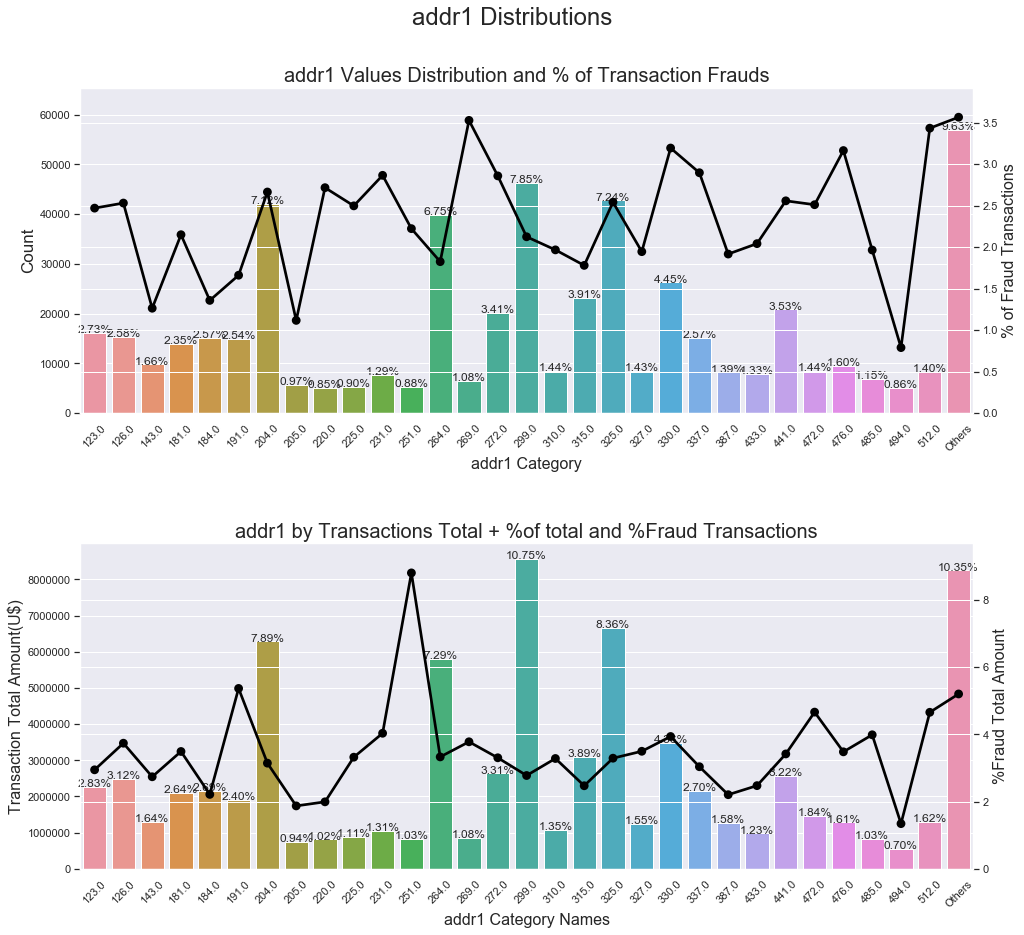

In [51]:
ploting_cnt(Train_data, 'addr1')

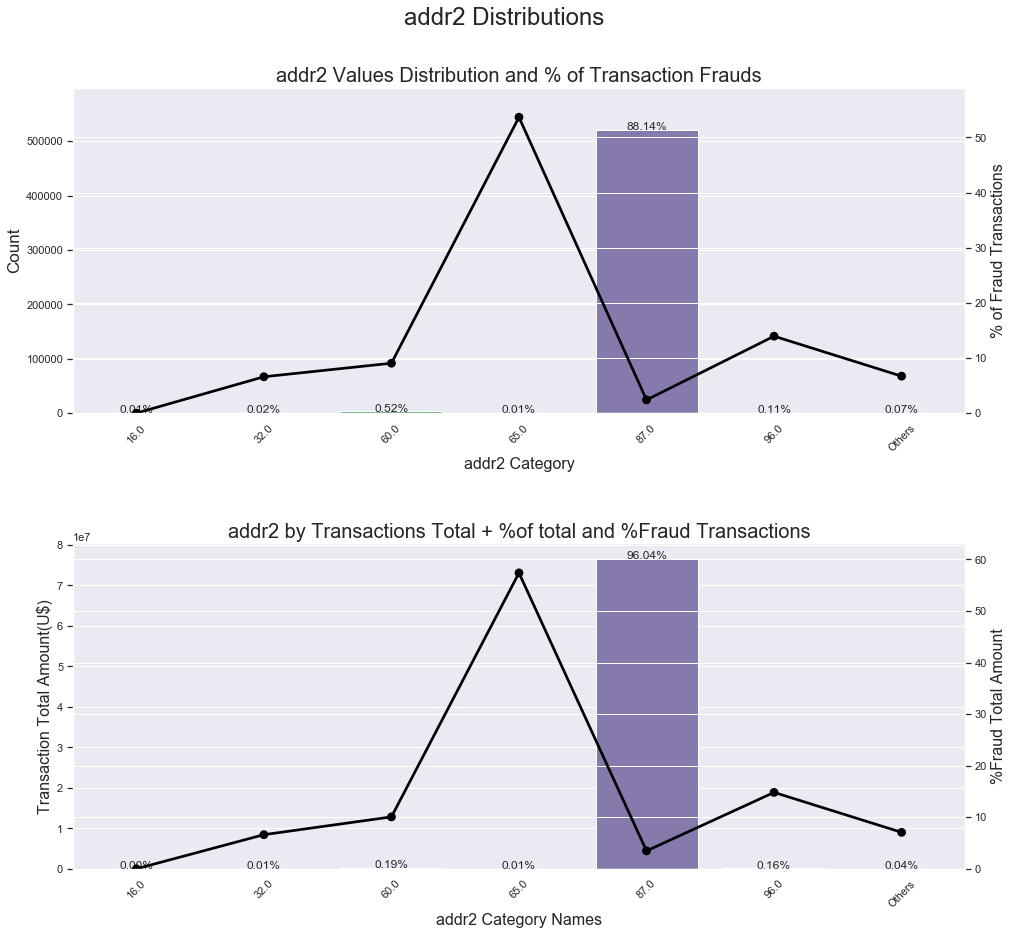

In [52]:
ploting_cnt(Train_data, 'addr2')

In [53]:
Train_data.loc[Train_data['P_emaildomain'].isin(['gmail.com', 'gmail']),'P_emaildomain'] = 'Google'

Train_data.loc[Train_data['P_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'P_emaildomain'] = 'Yahoo Mail'
Train_data.loc[Train_data['P_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'P_emaildomain'] = 'Microsoft'
Train_data.loc[Train_data.P_emaildomain.isin(Train_data.P_emaildomain\
                                         .value_counts()[Train_data.P_emaildomain.value_counts() <= 500 ]\
                                         .index), 'P_emaildomain'] = "Others"
Train_data.P_emaildomain.fillna("NoInf", inplace=True)

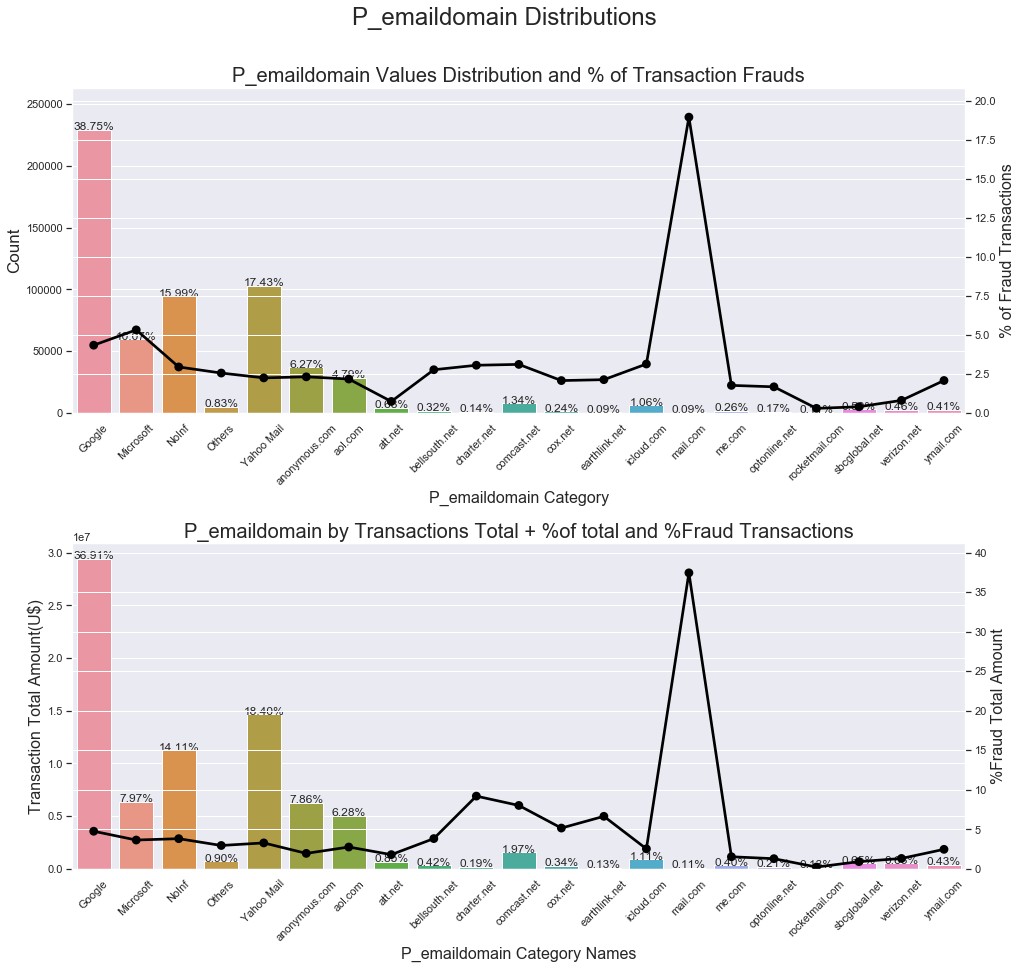

In [54]:
ploting_cnt(Train_data, 'P_emaildomain')

In [55]:
Train_data.loc[Train_data['R_emaildomain'].isin(['gmail.com', 'gmail']),'R_emaildomain'] = 'Google'

Train_data.loc[Train_data['R_emaildomain'].isin(['yahoo.com', 'yahoo.com.mx',  'yahoo.co.uk',
                                         'yahoo.co.jp', 'yahoo.de', 'yahoo.fr',
                                         'yahoo.es']), 'R_emaildomain'] = 'Yahoo Mail'
Train_data.loc[Train_data['R_emaildomain'].isin(['hotmail.com','outlook.com','msn.com', 'live.com.mx', 
                                         'hotmail.es','hotmail.co.uk', 'hotmail.de',
                                         'outlook.es', 'live.com', 'live.fr',
                                         'hotmail.fr']), 'R_emaildomain'] = 'Microsoft'
Train_data.loc[Train_data.R_emaildomain.isin(Train_data.R_emaildomain\
                                         .value_counts()[Train_data.R_emaildomain.value_counts() <= 500 ]\
                                         .index), 'R_emaildomain'] = "Others"
Train_data.R_emaildomain.fillna("NoInf", inplace=True)

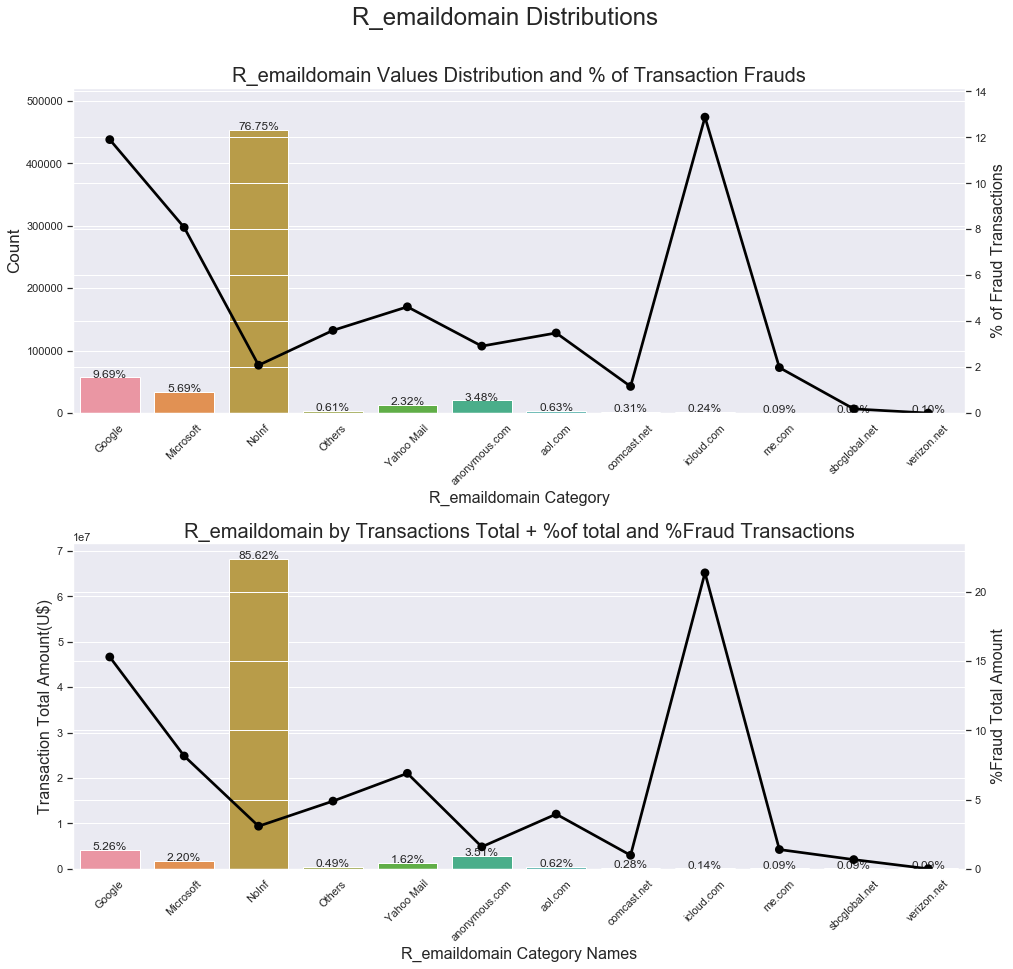

In [56]:
ploting_cnt(Train_data, 'R_emaildomain')

In [57]:
Train_data.loc[Train_data.C1.isin(Train_data.C1\
                                         .value_counts()[Train_data.C1.value_counts() <= 400 ]\
                                         .index), 'C1'] = "Others"

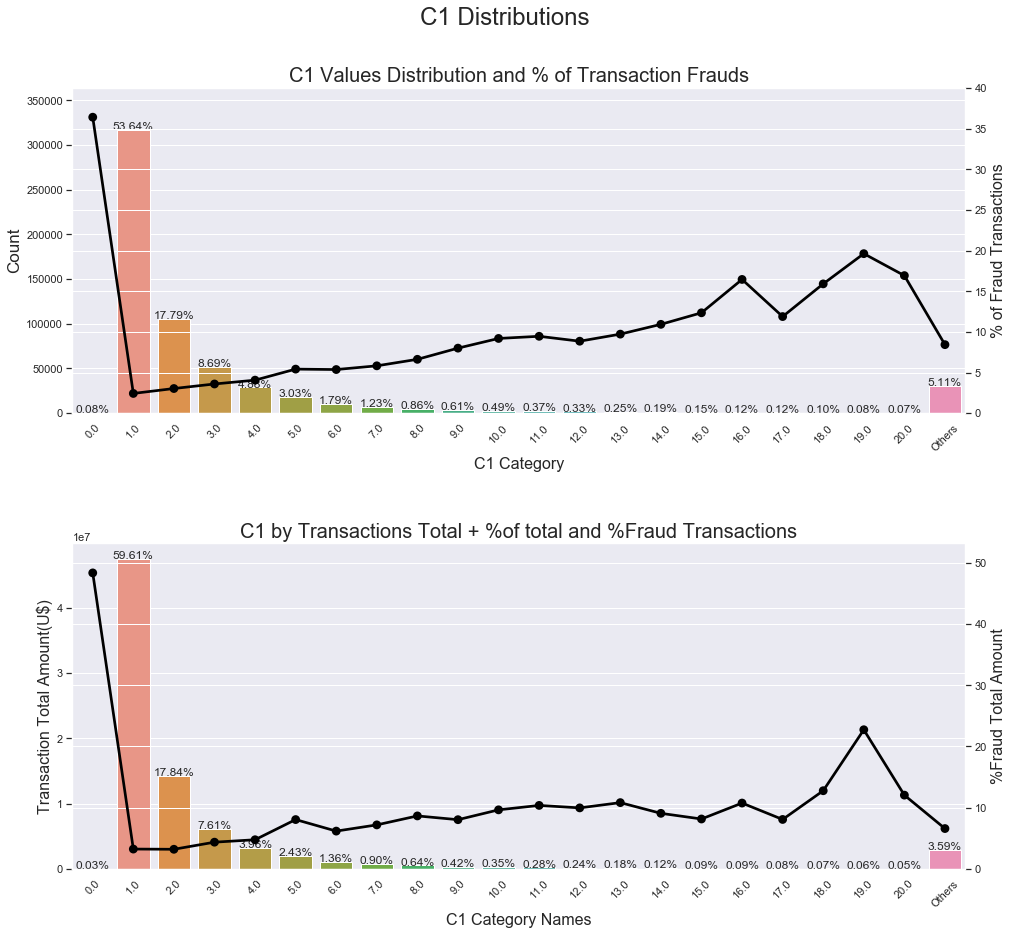

In [58]:
ploting_cnt(Train_data, 'C1')

In [59]:
Train_data.loc[Train_data.C2.isin(Train_data.C2\
                                         .value_counts()[Train_data.C2.value_counts() <= 350 ]\
                                         .index), 'C2'] = "Others"

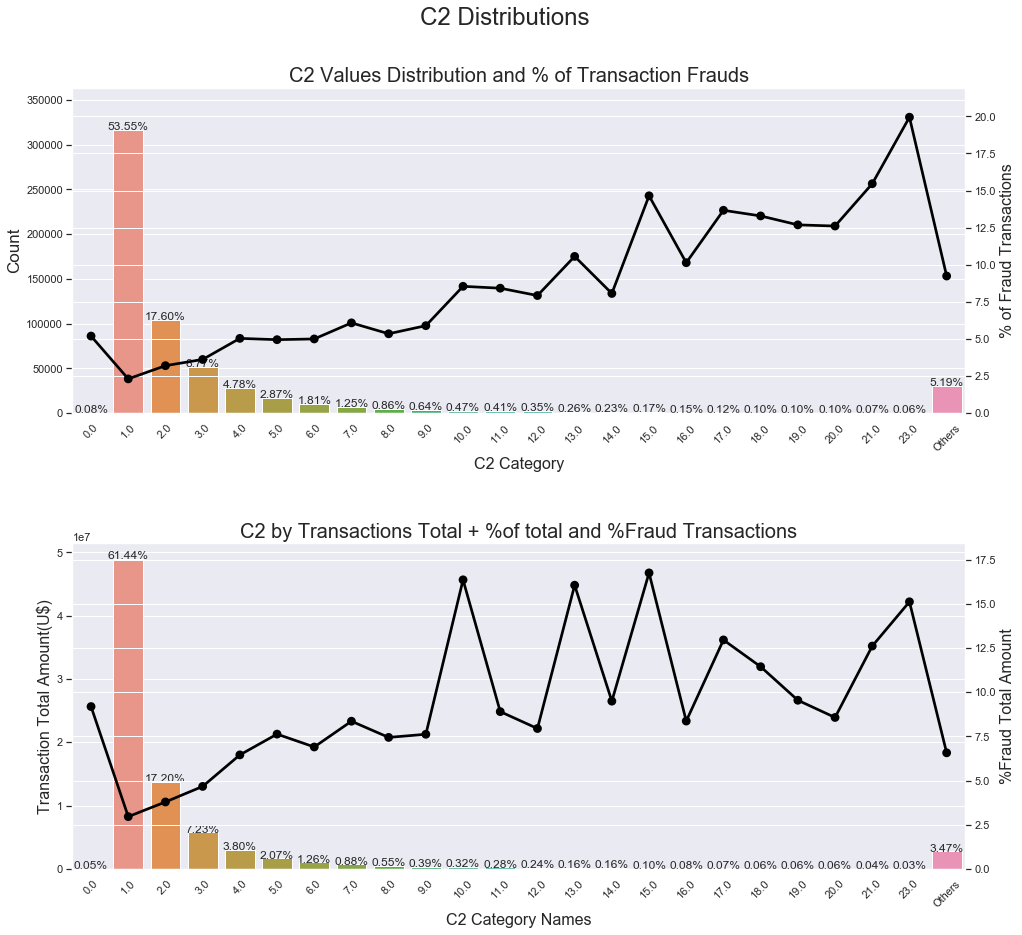

In [60]:
ploting_cnt(Train_data, 'C2')

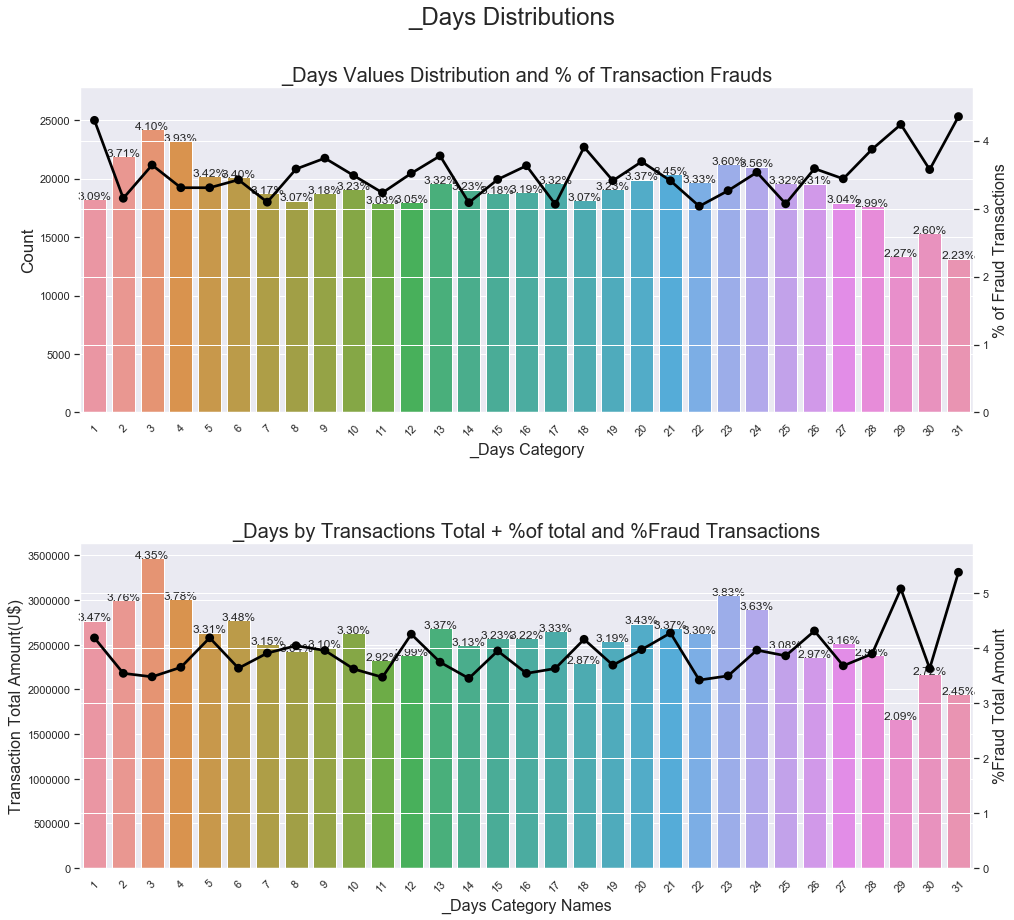

In [61]:
ploting_cnt(Train_data, '_Days')

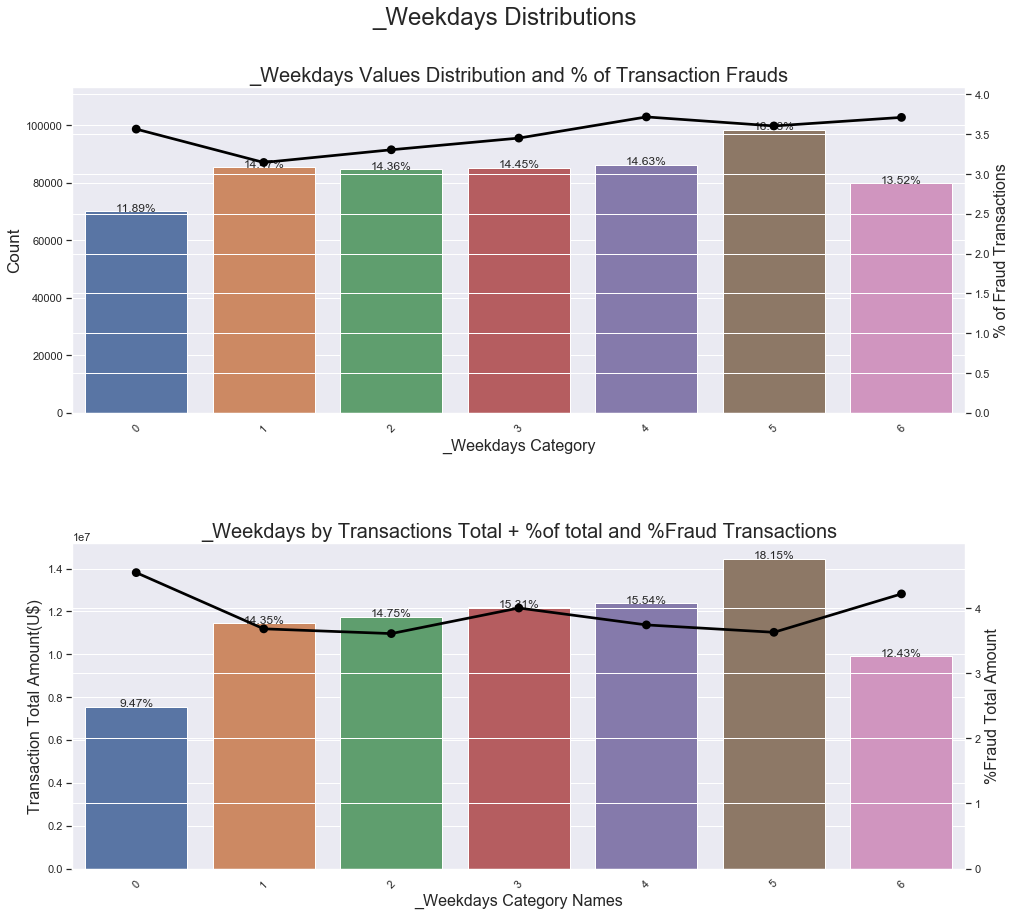

In [62]:
ploting_cnt(Train_data, '_Weekdays')

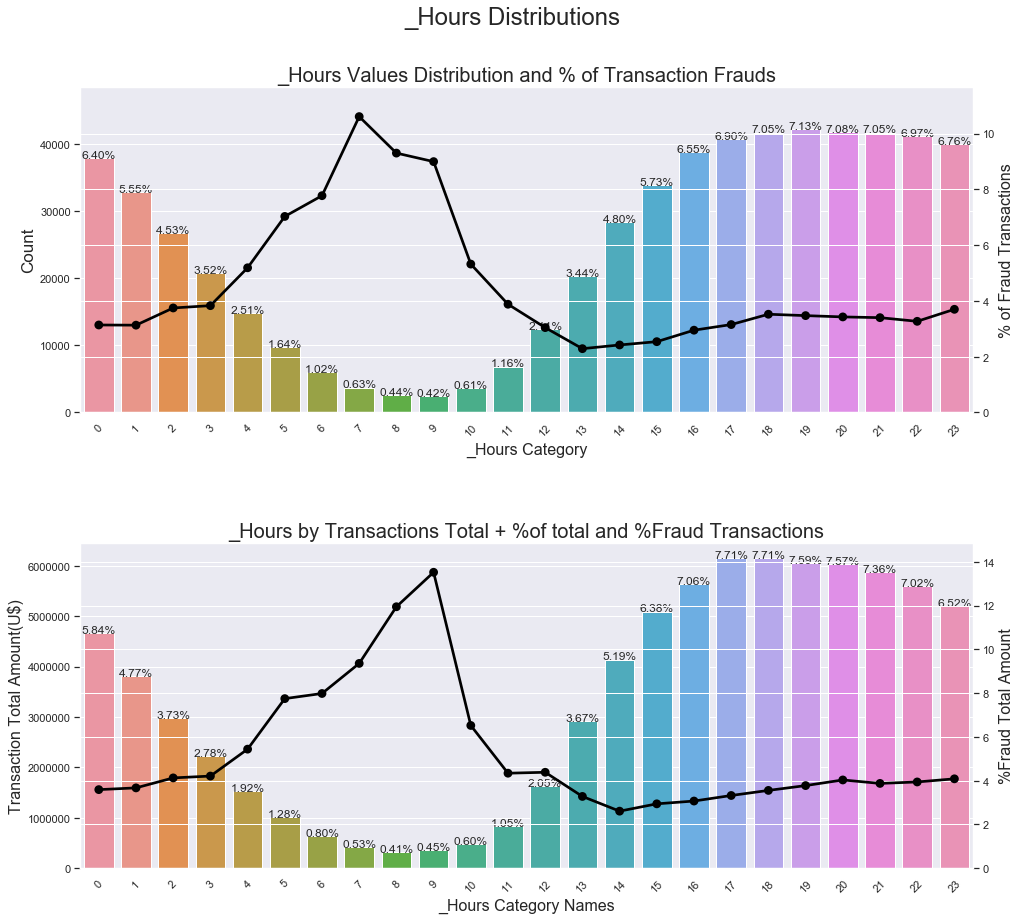

In [63]:
ploting_cnt(Train_data, '_Hours')

In [64]:
import plotly.graph_objects as go

from plotly.offline import iplot

color_op = ['#5527A0', '#BB93D7', '#834CF7', '#6C941E', '#93EAEA', '#7425FF', '#F2098A', '#7E87AC', 
            '#EBE36F', '#7FD394', '#49C35D', '#3058EE', '#44FDCF', '#A38F85', '#C4CEE0', '#B63A05', 
            '#4856BF', '#F0DB1B', '#9FDBD9', '#B123AC']

dates= Train_data.groupby(Train_data.Date.dt.date)['TransactionAmt'].count().reset_index()

Track = go.Scatter(x=dates['Date'], y=dates.TransactionAmt,
                    opacity = 0.8, line = dict(color = color_op[7]), name= 'Total Transactions')

dates_sum = Train_data.groupby(Train_data.Date.dt.date)['TransactionAmt'].sum().reset_index()

Track1  = go.Scatter(x=dates_sum.Date,line = dict(color = color_op[7]), name="Total Amount",
                        y=dates_sum['TransactionAmt'], opacity = 0.8, yaxis='y2')

layout = dict(
    title= "Total Transactions and Fraud Informations by Date",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=3, label='3m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible = True),
        type='date' ),
    yaxis=dict(title='Total Transactions'),
    yaxis2=dict(overlaying='y',
                anchor='x', side='right',
                zeroline=False, showgrid=False,
                title='Total Transaction Amount')
)

fig = dict(data= [Track, Track1,], layout=layout)

iplot(fig)

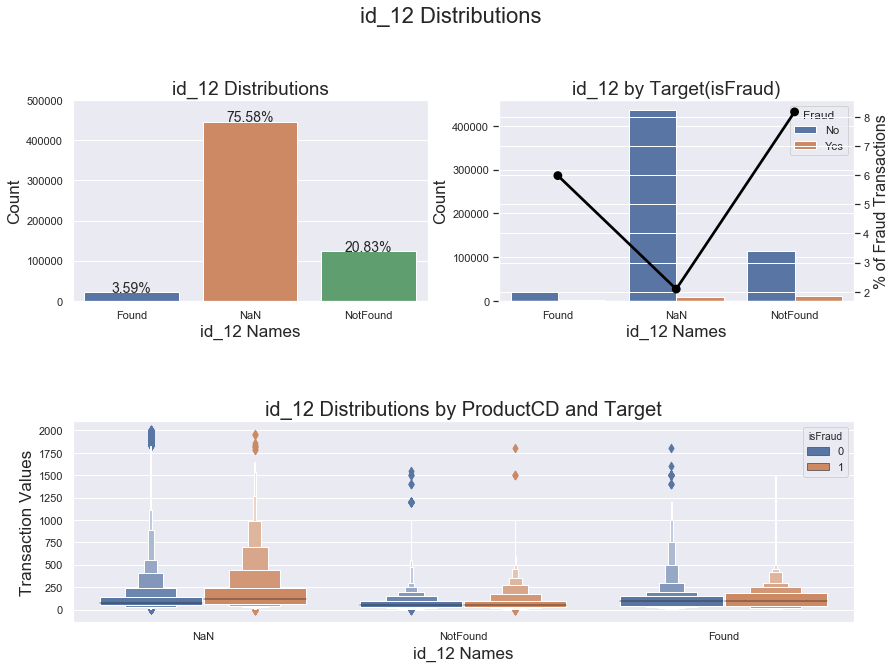

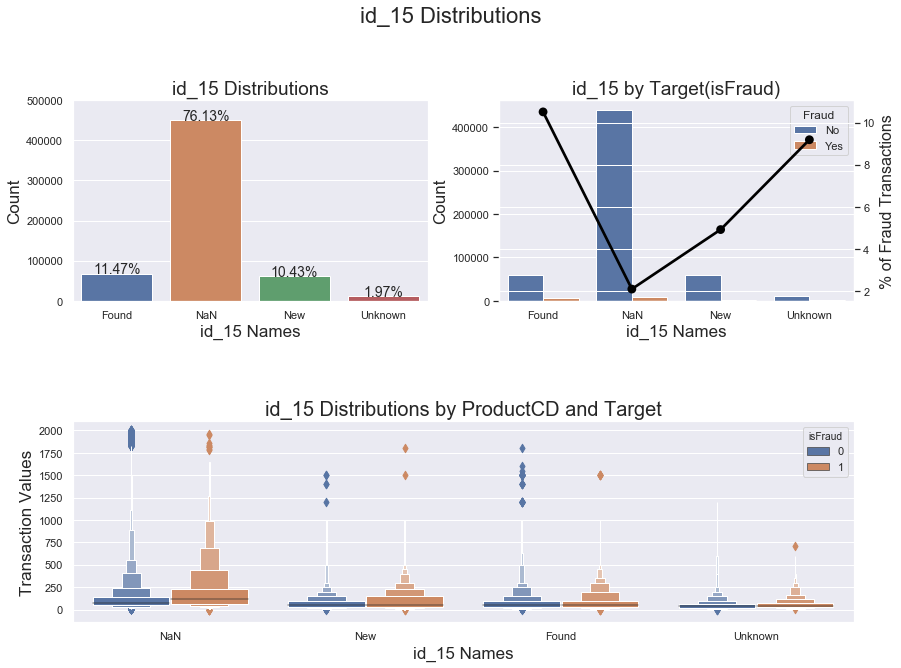

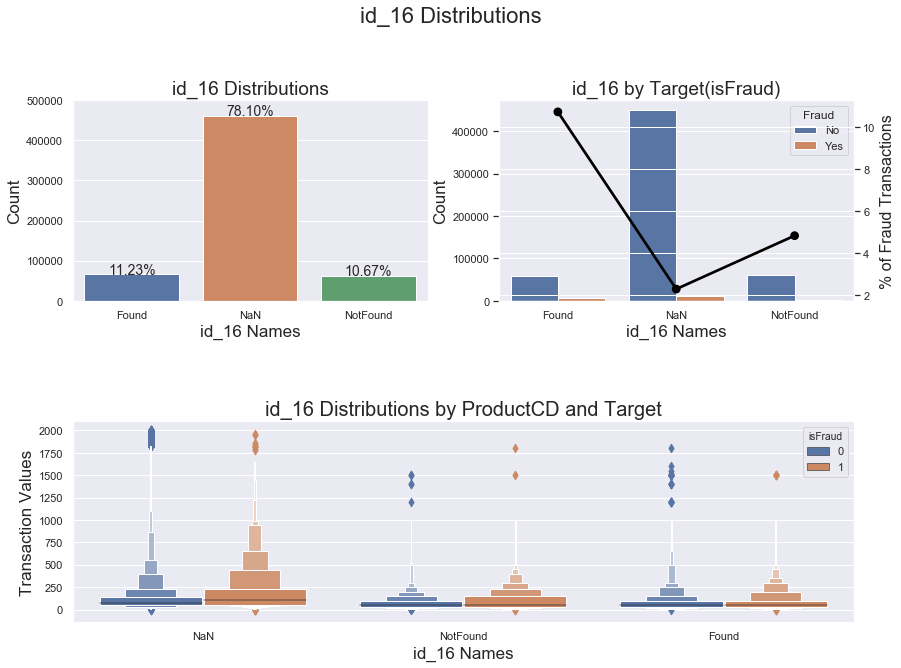

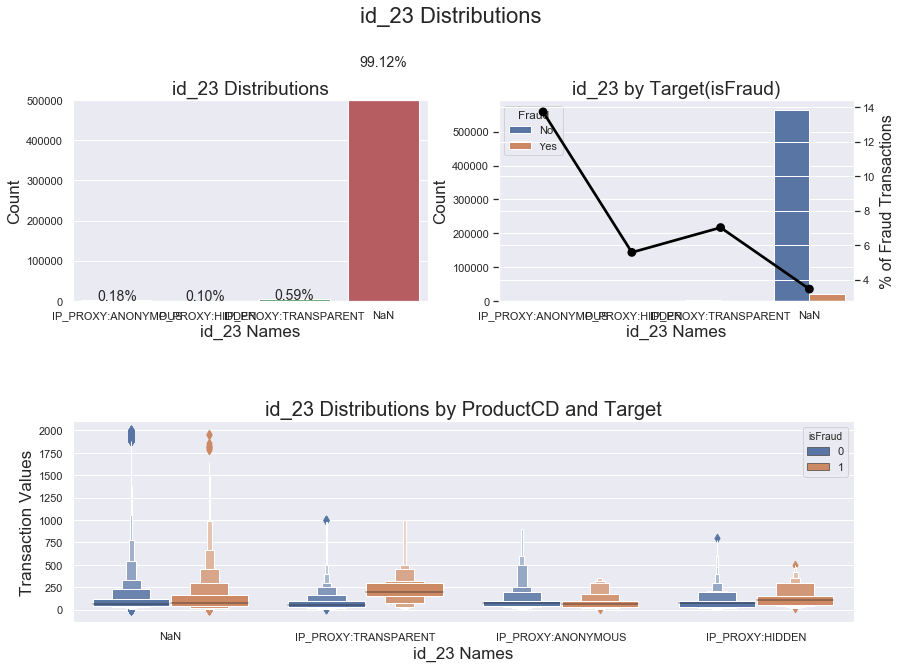

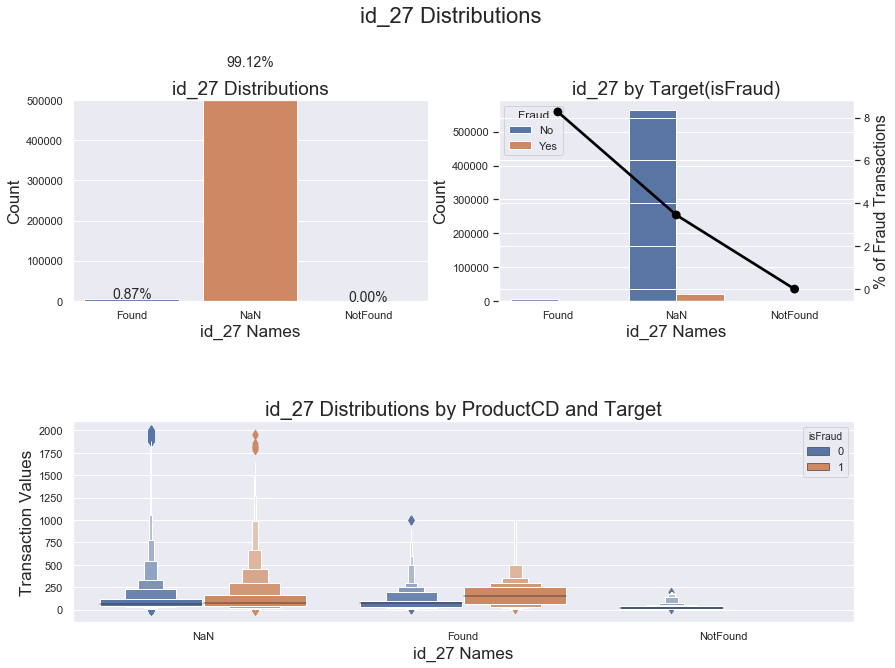

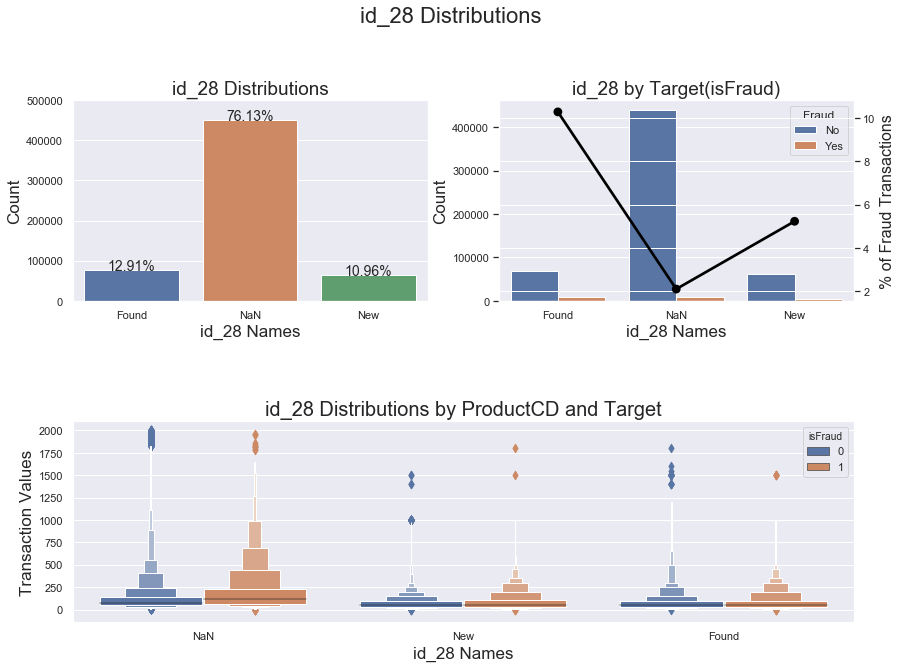

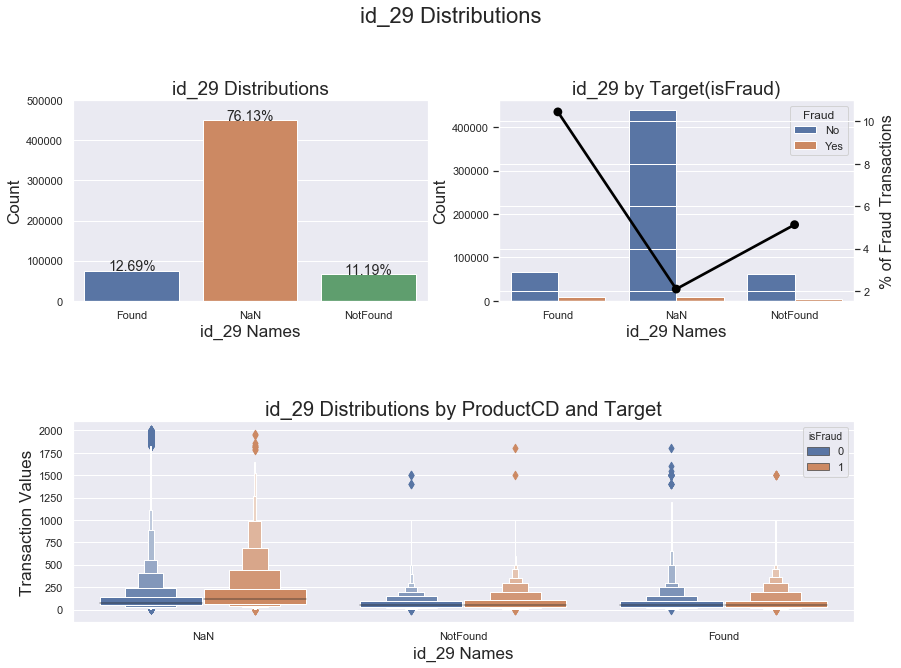

In [65]:
for col in ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29']:
    Train_data[col] = Train_data[col].fillna('NaN')
    ploting(Train_data, col)

In [66]:
Train_data.loc[Train_data['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
Train_data.loc[Train_data['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
Train_data.loc[Train_data['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
Train_data.loc[Train_data['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
Train_data['id_30'].fillna("NAN", inplace=True)

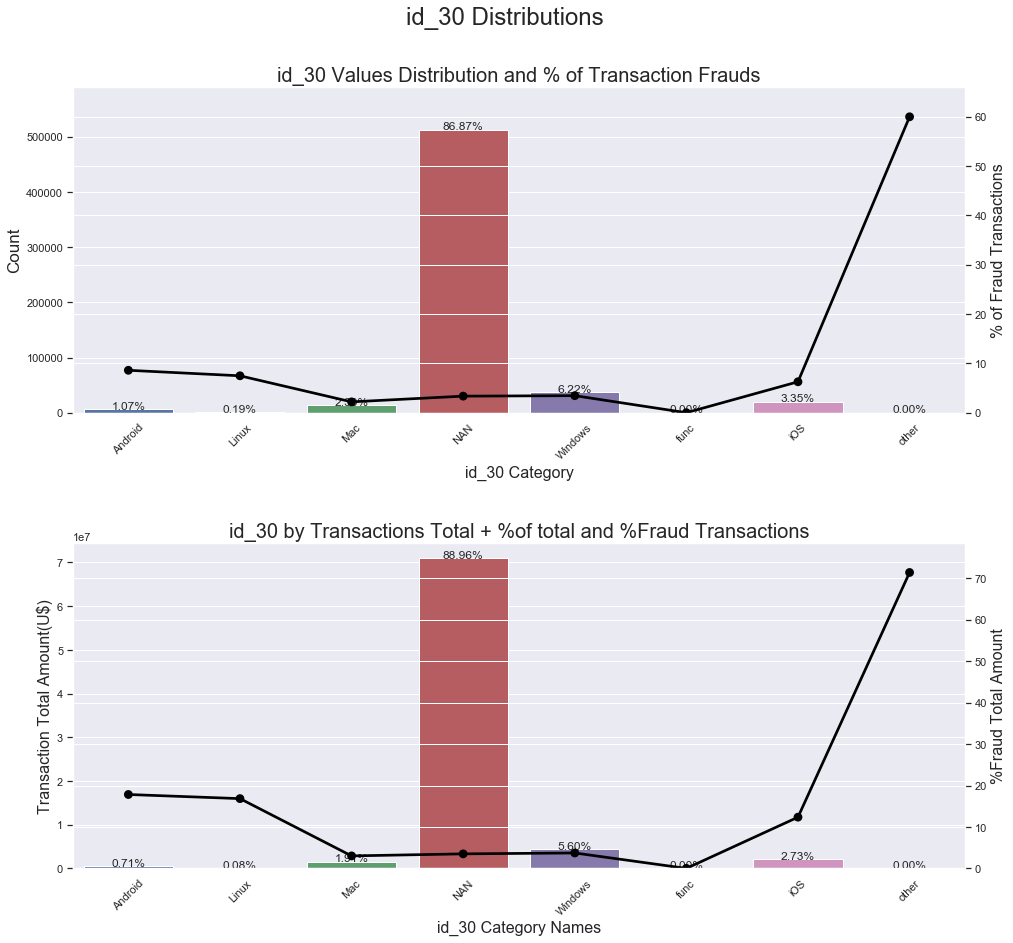

In [67]:
ploting_cnt(Train_data, 'id_30')

In [68]:
Train_data.loc[Train_data['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
Train_data.loc[Train_data['id_31'].str.contains('firefox', na=False), 'id_31'] = 'Firefox'
Train_data.loc[Train_data['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
Train_data.loc[Train_data['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
Train_data.loc[Train_data['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
Train_data.loc[Train_data['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
Train_data.loc[Train_data['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'
Train_data['id_31'].fillna("NAN", inplace=True)
Train_data.loc[Train_data.id_31.isin(Train_data.id_31.value_counts()[Train_data.id_31.value_counts() < 200].index), 'id_31'] = "Others"

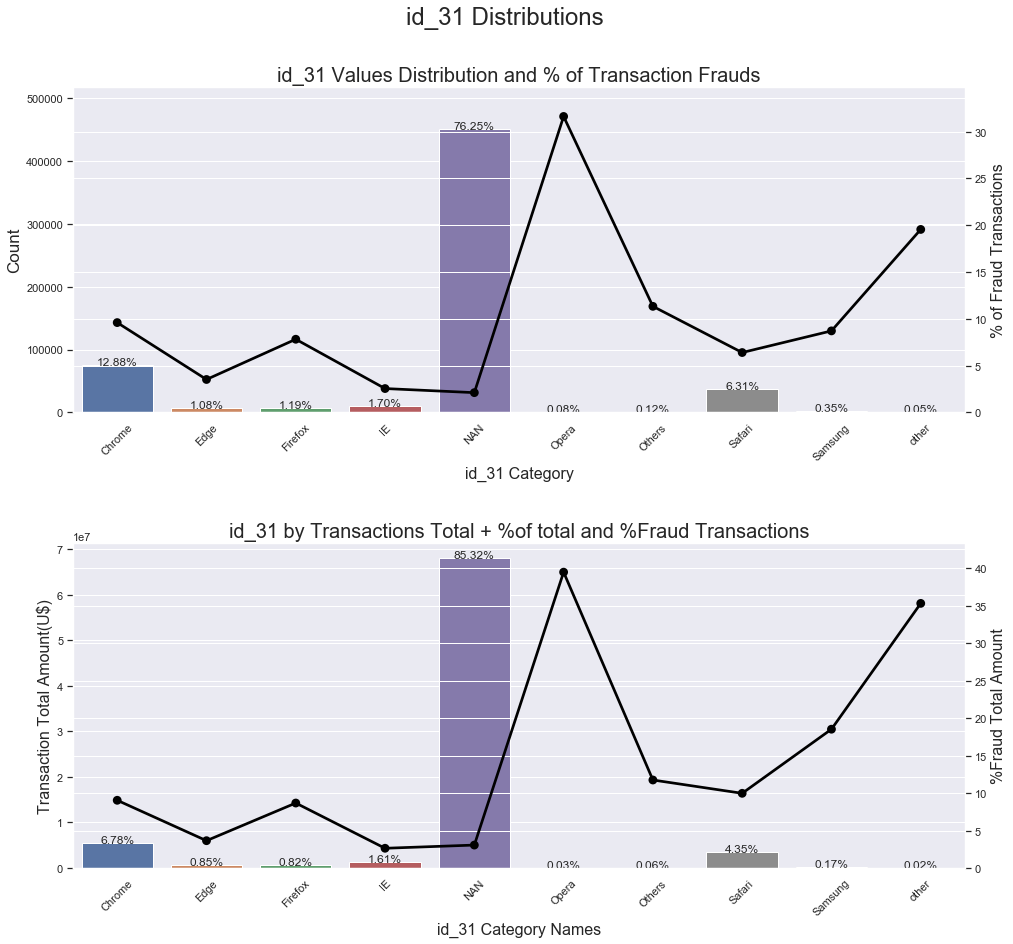

In [69]:
ploting_cnt(Train_data, 'id_31')